# Alan Saul Bonilla Vizcarra
23000220 

Fundamentos de Machine Learning

Analisis del RIT Dataset

# Importar librerias

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

pip install --upgrade pip pandas matplotlib seaborn scikit-learn statsmodels xgboost tensorflow optuna IPython pydotplus graphviz keras

In [1]:
#Librerias basicas
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import perf_counter
import os

#Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE #Para Regresion Logistica
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Metricas de desempeño
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, recall_score, average_precision_score, log_loss, matthews_corrcoef
from sklearn.model_selection import cross_val_score

#Dividir conjutno
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Estandarizacion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#Modelos ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB

#Optimizacion
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna
from optuna.samplers import TPESampler

#Visualizacion de desempeño
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




# Archivo CSV

In [2]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FA67-B665

 Directorio de c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset

04/06/2025  03:07 p. m.    <DIR>          .
04/06/2025  03:07 p. m.    <DIR>          ..
11/05/2025  11:13 p. m.    <DIR>          .ipynb_checkpoints
27/01/2025  01:08 p. m.    <DIR>          .vs
04/06/2025  03:07 p. m.         4,717,688 11Analisis del RIT Dataset con ML.ipynb
04/06/2025  03:07 p. m.         4,458,906 22Analisis del RIT Dataset con ML.ipynb
04/06/2025  03:10 p. m.           138,223 33Analisis del RIT Dataset con ML.ipynb
04/06/2025  03:10 p. m.           138,209 44Analisis del RIT Dataset con ML.ipynb
03/05/2024  12:55 p. m.         2,889,481 alvares2021.pdf
31/10/2024  11:23 a. m.         4,440,159 Analisis del RIT Dataset con ML v 2024 06 17 - copia.ipynb
30/11/2024  09:30 a. m.           680,096 Analisis del RIT Dataset con ML v 202

In [3]:
cd "VoIP Enterprise - Attack Dataset"

c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset


In [4]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n�mero de serie del volumen es: FA67-B665

 Directorio de c:\Users\Alsabov\Desktop\Mi unidad\Maestria CI\2 Semestre\Fundamentos de Aprendizaje Automatico\VoIP Enterprise - Attack Dataset\VoIP Enterprise - Attack Dataset

27/05/2025  10:03 a. m.    <DIR>          .
27/05/2025  10:03 a. m.    <DIR>          ..
20/05/2025  12:12 p. m.         7,382,547 AtaquesRIT.csv
18/05/2025  01:44 p. m.    <DIR>          csv
18/05/2025  08:57 p. m.    <DIR>          Nueva carpeta
19/05/2025  11:59 a. m.           619,489 prueba-17-0905-1.csv
27/05/2025  10:03 a. m.           140,718 prueba-19-1005-2.csv
19/05/2025  12:12 p. m.           297,094 prueba-4-0405.csv
19/05/2025  11:56 a. m.    <DIR>          Saneado
19/05/2025  11:57 a. m.         1,195,519 Saneado.csv
20/05/2025  12:11 p. m.    <DIR>          VoIPEnterprise
               5 archivos      9,635,367 bytes
               6 dirs  820,834,607,104 bytes libres


In [5]:
# os.remove('archivo_concatenado.csv')
# ruta = "*.csv"
# Lista de DataFrames cargando cada archivo CSV
# dataframes = [pd.read_csv(archivo) for archivo in glob.glob(ruta)]

# Concatenar todos los DataFrames en uno solo
# df_concatenado = pd.concat(dataframes, ignore_index=True)

# Opcional: guardar el resultado en un nuevo archivo CSV
# df_concatenado.to_csv("archivo_aconcatenado.csv", index=False)

# Importar Dataset

Comenzamos leyendo el dataset con el metodo `pd.read_csv()`

In [6]:
#df=pd.read_csv('Rochester.csv')
dfataque=pd.read_csv('prueba-19-1005-2.csv')
dfvalidacion=pd.read_csv('prueba-17-0905-1.csv')
dfsaneado=pd.read_csv('Saneado.csv')

print('dfataque',dfataque.shape,'dfvalidacion',dfvalidacion.shape,'dfsaneado',dfsaneado.shape)

df = pd.concat([dfataque, dfvalidacion, dfsaneado], ignore_index=True)
df.shape

dfataque (431, 52) dfvalidacion (1887, 52) dfsaneado (7014, 52)


(9332, 52)

## Acerca del dataset

Para el presente trabajo, se utliza el dataset proveido del paper *"Dataset of attacks on a live enterprise VoIP network for machine learning based intrusion detection and prevention systems"* del Rochester Institute of Technology, Dubai, United Arab Emirates.
Este dataset proporciona acceso a datos en bruto de una red VoIP empresarial gestionada por medio de Asterisk 17.0, programa de software libre que proporciona funcionalidades de una central telefónica.
Contiene registros de varios tipos de ataques que proporcionan a los investigadores una variedad de escenarios de ataque para investigar y/o entrenar modelos.


Para trabajar el dataset, es necesario utilizar una herramienta de conversion dado que los archivos vienen en formato PCAP el cual es un método para la captura, almacenamiento y análisis del tráfico de red.
Se utilizo la herramienta **3FEx: Fast Flow Feature Extractor** la cual agrupa los paquetes en flujos y los almacena en un archivo csv, extrayendo las siguientes caracteristicas

## Descripcion de las features
En la literatura de la herramienta utilizada para obtener los datos tenemos una descripcion detallada de lo que significa cada feature
| No. | Feature Name | Description |
| --- | --- | --- |
|0|proto| Protocol type|
|1|ts|Session time stamp|
|2|srcIP|IPv4 source address|
|3|srcPort| Source port|
|4|dstIP|IPv4 destination address|
|5|dstPort|Destination port|
|6|flowduration|Session duration|
|7|total_fpackets|Number of packets in the forward direction|
|8|total_bpackets|Number of packets in the backward direction|
|9|total_fpktl|Transmited bytes in forward direction|
|10|total_bpktl|Transmited bytes in backward direction|
|11|min_fpktl|Minimum packet size in forward direction|
|12|min_bpktl|Minimum packet size in backward direction|
|13|max_fpktl|Maximum packet size in forward direction|
|14| max_bpktl|Maximum packet size in backward direction|
|15|mean_fpktl|Mean packet size in forward direction|
|16| mean_bpktl|Mean packet size in backward direction|
|17|std_fpktl|Standard deviation packet size in forward direction|
|18|std_bpktl|Standard deviation packet size in backward direction|
|19|total_ﬁpt|Sum of interarrival times in forward direction|
|20|total_bipt|Sum of interarrival times in backward direction|
|21| min_ﬁpt|Minimum interarrival time in forward direction|
|22|min_bipt|Minimum interarrival time in backward direction|
|23| max_ﬁpt|Maximum interarrival time in forward direction|
|24| max_bipt|Maximum interarrival time in backward direction|
|25| mean_ﬁpt|Mean interarrival time in forward direction|
|26| mean_bipt|Mean interarrival time in backward direction|
|27|std_ﬁpt|Standard deviation packet size in forward direction|
|28|std_bipt|Standard deviation packet size in backward direction|
|29|fpsh_cnt|Number PSH ﬂags in forward direction|
|30|bpsh_cnt|Number PSH ﬂags in backward direction|
|31|furg_cnt|Number URG ﬂags in forward direction|
|32| burg_cnt|Number URG ﬂags in backward direction|
|33|total_fhlen|Sum of headers length in forward direction|
|34|total_bhlen|Sum of headers length in backward direction|
|35|fPktsPerSecond|Packets per second in forward direction|
|36|bPktsPerSecond|Packets per second in backward direction|
|37| ﬂowBytesPerSecond|Total Bytes per second in session|
|38| mean_ﬂowpktl|Average package length|
|39|std_ﬂowpktl|Standard deviation of package length|
|40| mean_ﬂowipt|Average of interarrival times|
|41|std_ﬂowipt|Standard deviation of interarrival times|
|42| ﬂow_ﬁn|Number of packets with FIN ﬂag set. Is set to signal the graceful termination of a connection.|
|43| ﬂow_syn|Number of packets with SYN ﬂag set. It is used to request the establishment of a connection|
|44| ﬂow_rst|Number of packets with RST ﬂag set. The reset flag is used to terminate a connection abruptly.|
|45| ﬂow_ack|Number of packets with ACK ﬂag set. It is set in response to a received packet with the SYN flag.|
|46| ﬂow_urg|Number of packets with URG ﬂag set. Is used to indicate that the data in the packet is urgent and should be processed immediately.|
|47| ﬂow_cwr|Number of packets with CWR ﬂag set. This flag is used to indicate that the TCP sender is reducing its congestion window.|
|48| ﬂow_ece|Number of packets with ECE ﬂag set. Is used in conjunction with the CWR flag to indicate that congestion has been encountered in the network|
|49| downUpRatio|Download and upload ratio|

## Tipos de ataques
Los ataques que el dataset recolecto y se utlizaron para el presente trabajo son los siguientes:
- **BYE attack:** "El BYE es un ataque de suplantación que envía mensajes BYE (indicando la finalización de una sesión) a un servidor SIP para terminar llamadas activas legítimas en la red VoIP.
- **INVITE flood attack:** En este tipo de ataque, se envían una gran cantidad de mensajes INVITE a un servidor con el objetivo de agotar los recursos del servidor, como la CPU y la memoria
- **REGISTER hijacking attack:** implica que un atacante se haga pasar por un usuario legítimo al reemplazar la dirección de registro de un agente de usuario (UA) con su propia dirección.
- **RTP flood attack:** En un ataque de inundación RTP, los atacantes generan y envían una gran cantidad de paquetes RTP falsificados o innecesarios a un dispositivo o servidor VoIP con el objetivo de abrumar el sistema y agotar sus recursos. Este tipo de ataque puede causar **interrupciones en la calidad del servicio, retrasos en la comunicación y**, en casos extremos, la **interrupción total del servicio de VoIP**.  
- **REGISTER flood (SIPsak):** En este tipo de ataque, los atacantes envían una gran cantidad de paquetes de registro SIP (REGISTER) al servidor SIP con el objetivo de agotar sus recursos y provocar una denegación de servicio. Esto puede causar puede causar retrasos en la entrega de paquetes, pérdida de llamadas y una degradación general en la calidad del servicio.


# EDA

Con el metodo `head()` hacemos que nos muestre los 5 primeros rasgos del Dataset

In [7]:
##Configuramos para que muestre todas las columnas
pd.set_option('display.max_columns', None)

In [8]:
df.head()

proto          ts           srcIP srcPrt           dstIP  dstPrt  \
0   TCP  1746922064  159.89.237.190  24969  216.238.92.208    5060   
1   TCP  1746922085  159.89.237.190  24970  216.238.92.208    5060   
2   UDP  1746920826  207.154.234.51  59010  216.238.92.208    5060   
3   UDP  1746920827  189.182.44.235  54988  216.238.92.208    5060   
4   UDP  1746920833   200.23.110.56  61290  216.238.92.208    5060   

   flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0     21.538272               6               3          542          166   
1     11.146822               3               3          284          166   
2      0.959266              12               6         8545         3200   
3   5613.472329             557             134       127195        69027   
4   2998.742412             268             120        61504        59902   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         54        268         58   90.333336   55.333332   
1         54         54        176         58   94.666664   55.333332   
2        374        531       1095        535  712.083313  533.333313   
3         44        479        869        615  228.357269  515.126892   
4         44        479        870        615  229.492538  499.183319   

    std_fpktl  std_bpktl   total_fipt   total_bipt  min_fipt  min_bipt  \
0   87.053238   2.309401    21.538272     6.537755  0.000001  0.000018   
1   70.436732   2.309401    11.146821    11.000765  0.121183  0.121182   
2  358.873352   1.505545     0.959266     0.779010  0.000097  0.140628   
3  331.269914  51.395770  5613.471766  5601.603351  0.014992  0.036216   
4  331.925501  42.222298  2686.588515  2983.755884  0.014533  0.031248   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt   std_bipt  fpsh_cnt  \
0  15.000531   6.537737   4.307654   3.268878  6.134494   4.622865         0   
1  11.025639  10.879583   5.573411   5.500382  7.710615   7.607338         0   
2   0.183167   0.183281   0.087206   0.155802  0.084460   0.018784         0   
3  14.041355  60.001171  10.096172  42.117317  4.411426  24.140743         0   
4  14.054230  60.024544  10.062130  25.073580  4.385590  26.100552         0   

   bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         0          124           64        0.278574   
1         0         0         0           60           64        0.269135   
2         0         0         0         8137         2996       12.509565   
3         0         0         0       108257        64471        0.099226   
4         0         0         0        52392        55822        0.089371   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        0.139287           32.871719      78.666667     71.021118   
1        0.269135           40.370251      75.000000     49.505554   
2        6.254783        12243.737310     652.500000    301.419037   
3        0.023871           34.955547     283.968162    319.077911   
4        0.040017           40.485638     312.902062    303.542175   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0      2.692301     5.145311         0         2         1         7   
1      4.405309     5.977269         1         2         1         4   
2      0.056582     0.079280         0         0         0         0   
3      9.034667     4.906245         0         0         0         0   
4      8.458630     5.617998         0         0         0         0   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  Ataque  
0         0         0         0     0.306273      1       1  
1         0         0         0     0.584507      1       1  
2         0         0         0     0.374488      1       1  
3         0         0         0     0.542686      0       0  
4         0         0         0     0.973953      1       1

Con la variable `target_names` definimos los nombres de las clases

In [9]:
target_names = ['class 0', 'class 1']

Aplicamos el metodo `describe()` para conocer las estadisiticas del Dataset

In [10]:
df.describe()

dstPrt  flowduration  total_fpackets  total_bpackets  \
count   9332.000000   9332.000000     9332.000000     9332.000000   
mean    8243.448778     26.424623      195.782362      212.368195   
std    11707.226119    372.091689     2462.940006     4387.290185   
min        0.000000      0.000000        0.000000        0.000000   
25%     1947.000000      0.000000        1.000000        0.000000   
50%     5060.000000      0.000000        1.000000        0.000000   
75%     7911.000000      0.778094        3.000000        6.000000   
max    65389.000000  22919.559380   188752.000000   309705.000000   

        total_fpktl   total_bpktl    min_fpktl    min_bpktl    max_fpktl  \
count  9.332000e+03  9.332000e+03  9332.000000  9332.000000  9332.000000   
mean   6.936568e+04  8.088453e+04   143.225246   123.391770   277.779361   
std    1.199475e+06  2.571676e+06   155.485685   200.572227   371.978731   
min    0.000000e+00  0.000000e+00     0.000000     0.000000     0.000000   
25%    5.800000e+01  0.000000e+00    58.000000     0.000000    58.000000   
50%    5.800000e+01  0.000000e+00    58.000000     0.000000    58.000000   
75%    2.187000e+03  3.122000e+03    63.000000   358.000000   506.000000   
max    7.149178e+07  1.957336e+08  1118.000000   641.000000  1420.000000   

         max_bpktl   mean_fpktl   mean_bpktl    std_fpktl    std_bpktl  \
count  9332.000000  9332.000000  9332.000000  9332.000000  9332.000000   
mean    189.531719   216.992551   150.510306    58.006804    15.254911   
std     308.393025   263.418360   235.209065   112.336429    41.366511   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    58.000000     0.000000     0.000000     0.000000   
50%       0.000000    58.000000     0.000000     0.000000     0.000000   
75%     521.000000   352.287697   417.666656    78.904260     1.032796   
max    1399.000000  1118.000000   691.750000   514.821206   477.811894   

         total_fipt    total_bipt     min_fipt     min_bipt     max_fipt  \
count   9332.000000   9332.000000  9332.000000  9332.000000  9332.000000   
mean      21.906173     25.147634     0.054133     0.051147     0.718206   
std      371.556929    369.871794     1.080496     1.200078     4.808118   
min        0.000000      0.000000     0.000000     0.000000     0.000000   
25%        0.000000      0.000000     0.000000     0.000000     0.000000   
50%        0.000000      0.000000     0.000000     0.000000     0.000000   
75%        0.171051      0.775918     0.000056     0.000053     0.160977   
max    22919.559390  22877.935190    55.356663    60.015919   128.074188   

          max_bipt    mean_fipt    mean_bipt     std_fipt     std_bipt  \
count  9332.000000  9332.000000  9332.000000  9332.000000  9332.000000   
mean      2.052471     0.270221     0.684917     0.227444     0.628377   
std       8.891306     1.738928     2.809046     1.500887     2.801410   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.160478     0.082043     0.151275     0.006205     0.005346   
max     347.274963    67.291222    67.291222    51.929943    82.649437   

          fpsh_cnt     bpsh_cnt  furg_cnt     burg_cnt   total_fhlen  \
count  9332.000000  9332.000000    9332.0  9332.000000  9.332000e+03   
mean      0.061187     0.044578       0.0     0.011359  6.270379e+04   
std       1.232924     1.079790       0.0     0.775854  1.126504e+06   
min       0.000000     0.000000       0.0     0.000000  0.000000e+00   
25%       0.000000     0.000000       0.0     0.000000  2.400000e+01   
50%       0.000000     0.000000       0.0     0.000000  2.400000e+01   
75%       0.000000     0.000000       0.0     0.000000  2.084000e+03   
max      60.000000    52.000000       0.0    53.000000  6.507422e+07   

        total_bhlen  fPktsPerSecond  b

El método `info()` muestra el resumen del dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   proto               9332 non-null   object 
 1   ts                  9332 non-null   object 
 2   srcIP               9332 non-null   object 
 3   srcPrt              9332 non-null   object 
 4   dstIP               9332 non-null   object 
 5   dstPrt              9332 non-null   int64  
 6   flowduration        9332 non-null   float64
 7   total_fpackets      9332 non-null   int64  
 8   total_bpackets      9332 non-null   int64  
 9   total_fpktl         9332 non-null   int64  
 10  total_bpktl         9332 non-null   int64  
 11  min_fpktl           9332 non-null   int64  
 12  min_bpktl           9332 non-null   int64  
 13  max_fpktl           9332 non-null   int64  
 14  max_bpktl           9332 non-null   int64  
 15  mean_fpktl          9332 non-null   float64
 16  mean_b

Observamos que en el Dataset no existen objetos nulos/NaN, y en su mayoria esta compuesto por variables int y float.
Para este caso, se eliminan las columnas referentes al Protocolo, direcciones IP y numeros de Puerto para que los modelos puedan aprender de la demas informacion.

In [12]:
df.drop(['proto','ts','srcIP','srcPrt','dstIP','dstPrt'],axis=1,inplace=True)

Aplicamos la funcion `shape` para conocer las dimensiones del dataset

In [13]:
df.shape

(9332, 46)

Con `Counter` obtenemos la cantidad de observaciones de clase positiva y clase negativa. Inicialmente, observamos que el dataset esta muy desbalanceado con una proporcion de aprox 72:1

In [14]:
collections.Counter(df.label.values)

Counter({np.int64(0): 7019, np.int64(1): 2313})

In [15]:
collections.Counter(df.Ataque.values)

Counter({np.int64(0): 7015, np.int64(10): 1887, np.int64(1): 430})

Revisamos por medio de `duplicated().sum()` la cantidad de observaciones duplicadas

Eliminamos dichas observaciones duplicadas para no exponernos a **Data Leak**

In [16]:
# Eliminar duplicados
df = df.drop_duplicates()
# Eliminar duplicados en todas las columnas excepto 'label' y 'Ataque'
df_cleaned = df.drop(['label', 'Ataque'], axis=1).duplicated(keep='first')

# Filtrar el DataFrame original solo por las filas no duplicadas
df_cleaned = df[~df_cleaned]
df=df_cleaned.copy()

df.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0     21.538272               6               3          542          166   
1     11.146822               3               3          284          166   
2      0.959266              12               6         8545         3200   
3   5613.472329             557             134       127195        69027   
4   2998.742412             268             120        61504        59902   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         54        268         58   90.333336   55.333332   
1         54         54        176         58   94.666664   55.333332   
2        374        531       1095        535  712.083313  533.333313   
3         44        479        869        615  228.357269  515.126892   
4         44        479        870        615  229.492538  499.183319   

    std_fpktl  std_bpktl   total_fipt   total_bipt  min_fipt  min_bipt  \
0   87.053238   2.309401    21.538272     6.537755  0.000001  0.000018   
1   70.436732   2.309401    11.146821    11.000765  0.121183  0.121182   
2  358.873352   1.505545     0.959266     0.779010  0.000097  0.140628   
3  331.269914  51.395770  5613.471766  5601.603351  0.014992  0.036216   
4  331.925501  42.222298  2686.588515  2983.755884  0.014533  0.031248   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt   std_bipt  fpsh_cnt  \
0  15.000531   6.537737   4.307654   3.268878  6.134494   4.622865         0   
1  11.025639  10.879583   5.573411   5.500382  7.710615   7.607338         0   
2   0.183167   0.183281   0.087206   0.155802  0.084460   0.018784         0   
3  14.041355  60.001171  10.096172  42.117317  4.411426  24.140743         0   
4  14.054230  60.024544  10.062130  25.073580  4.385590  26.100552         0   

   bpsh_cnt  furg_cnt  burg_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
0         0         0         0          124           64        0.278574   
1         0         0         0           60           64        0.269135   
2         0         0         0         8137         2996       12.509565   
3         0         0         0       108257        64471        0.099226   
4         0         0         0        52392        55822        0.089371   

   bPktsPerSecond  flowBytesPerSecond  mean_flowpktl  std_flowpktl  \
0        0.139287           32.871719      78.666667     71.021118   
1        0.269135           40.370251      75.000000     49.505554   
2        6.254783        12243.737310     652.500000    301.419037   
3        0.023871           34.955547     283.968162    319.077911   
4        0.040017           40.485638     312.902062    303.542175   

   mean_flowipt  std_flowipt  flow_fin  flow_syn  flow_rst  flow_ack  \
0      2.692301     5.145311         0         2         1         7   
1      4.405309     5.977269         1         2         1         4   
2      0.056582     0.079280         0         0         0         0   
3      9.034667     4.906245         0         0         0         0   
4      8.458630     5.617998         0         0         0         0   

   flow_urg  flow_cwr  flow_ece  downUpRatio  label  Ataque  
0         0         0         0     0.306273      1       1  
1         0         0         0     0.584507      1       1  
2         0         0         0     0.374488      1       1  
3         0         0         0     0.542686      0       0  
4         0         0         0     0.973953      1       1

Validamos por medio de `isnull().values.sum()` que no existan valores nulos y, en caso de existir, eliminamos la observacion con `dropna(inplace=True)`.

In [17]:
print("Valores nulos antes: ", df.isnull().values.sum())
df.dropna(inplace=True)
print("Valores nulos despues: ", df.isnull().values.sum())


Valores nulos antes:  1
Valores nulos despues:  0


Validamos nuevamente con `shape` y `Counter` la dimension resultante de nuestro dataset.

In [18]:
print("Total de datos; ",df.shape, "de los cuales ",collections.Counter(df.label.values))

Total de datos;  (3272, 46) de los cuales  Counter({np.int64(1): 2310, np.int64(0): 962})


In [19]:
df.describe(include='all').T

count           mean           std   min          25%  \
flowduration        3272.0      75.364448  6.255122e+02   0.0     0.771466   
total_fpackets      3272.0     556.535147  4.135684e+03   1.0     3.000000   
total_bpackets      3272.0     605.621638  7.393942e+03   0.0     6.000000   
total_fpktl         3272.0  197728.910147  2.019612e+06  42.0  2180.000000   
total_bpktl         3272.0  230688.320599  4.339521e+06   0.0  2743.000000   
min_fpktl           3272.0     301.063570  1.744886e+02  42.0    62.000000   
min_bpktl           3272.0     351.240526  1.857846e+02   0.0    74.000000   
max_fpktl           3272.0     684.822433  3.732988e+02  42.0   335.750000   
max_bpktl           3272.0     539.876834  2.862846e+02   0.0   511.000000   
mean_fpktl          3272.0     511.453694  2.534476e+02  42.0   213.933071   
mean_bpktl          3272.0     428.650114  1.959151e+02   0.0   213.921749   
std_fpktl           3272.0     165.439944  1.349804e+02   0.0    31.769365   
std_bpktl           3272.0      43.508201  6.043001e+01   0.0     1.032796   
total_fipt          3272.0      62.478118  6.255277e+02   0.0     0.170118   
total_bipt          3272.0      71.723020  6.220248e+02   0.0     0.762725   
min_fipt            3272.0       0.154392  1.820685e+00   0.0     0.000044   
min_bipt            3272.0       0.145874  2.023493e+00   0.0     0.000007   
max_fipt            3272.0       2.048379  7.951220e+00   0.0     0.157782   
max_bipt            3272.0       5.853807  1.425685e+01   0.0     0.157296   
mean_fipt           3272.0       0.770692  2.870574e+00   0.0     0.030845   
mean_bipt           3272.0       1.953438  4.475571e+00   0.0     0.022720   
std_fipt            3272.0       0.648688  2.480465e+00   0.0     0.003848   
std_bipt            3272.0       1.792182  4.505649e+00   0.0     0.003144   
fpsh_cnt            3272.0       0.174511  2.077625e+00   0.0     0.000000   
bpsh_cnt            3272.0       0.127139  1.820861e+00   0.0     0.000000   
furg_cnt            3272.0       0.000000  0.000000e+00   0.0     0.000000   
burg_cnt            3272.0       0.000000  0.000000e+00   0.0     0.000000   
total_fhlen         3272.0  178791.648533  1.897177e+06   8.0  2077.000000   
total_bhlen         3272.0  210069.093826  4.091380e+06   0.0  2226.000000   
fPktsPerSecond      3272.0     311.112047  2.122013e+03   0.0     0.072946   
bPktsPerSecond      3272.0     250.241096  2.034873e+03   0.0     0.340355   
flowBytesPerSecond  3272.0  180052.603082  7.442192e+05   0.0   243.529762   
mean_flowpktl       3272.0     451.073088  2.076795e+02  42.0   213.932338   
std_flowpktl        3272.0     115.353592  8.001631e+01   0.0    68.893475   
mean_flowipt        3272.0       1.220169  1.767463e+00   0.0     0.022996   
std_flowipt         3272.0       1.313150  2.167817e+00   0.0     0.044050   
flow_fin            3272.0       0.047677  3.560038e-01   0.0     0.000000   
flow_syn            3272.0       0.162592  5.675149e-01   0.0     0.000000   
flow_rst            3272.0       0.061736  2.457398e-01   0.0     0.000000   
flow_ack            3272.0       0.657396  6.336699e+00   0.0     0.000000   
flow_urg            3272.0       0.000000  0.000000e+00   0.0     0.000000   
flow_cwr            3272.0       0.000611  2.471963e-02   0.0     0.000000   
flow_ece            3272.0       0.000611  2.471963e-02   0.0     0.000000   
downUpRatio         3272.0       1.715962  2.955456e+00   0.0     0.858557   
label               3272.0       0.705990  4.556660e-01   0.0     0.000000   
Ataque              3272.0       5.889364  4.799303e+00   0.0     0.000000   

                            50%           75%           max  
flowduration           6.055069     41.142364  2.291956e+04  
total_fpackets         4.000000      6.000000  1.887520e+05  
total_bpackets         6.000000     14.000000  3.097050e+05  
total_fpktl         2208.000000   3652.000000  7.149178e+07  
total_bpktl         3156.000000   7831.00000

# Preprocesamiento de los datos

## Feature selection

`Feature selection` es un paso importante en el preprocesamiento de datos y en la ingeniería de características.
 - Hace referencia a la identificación y selección de las características más importantes para el problema que se está abordando.
 - Mejoramos el coste de cálculo necesario, reducimos la complejidad del modelo y mejoramos la precisión del modelo.

### Correlacion de Pearson

Comenzamos observando la matriz del coeficiente de correlación de Pearson

In [20]:
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Observamos inconsistencas en las features ademas de alta correlacion en varias de ellas.
Para reducirlo, se aplicaran tecnicas de Feature Engineering,

### VarianceThreshold

- `VarianceThreshold` selecciona solo las features cuya varianza supera un cierto umbral., en este caso *0.05*, lo que equivale a decir que el 95% de los valores en la columna son similares.
    - La idea detrás de este enfoque es que, si la varianza de una variable es pequeña, las probabilidades de que el valor contenido en ella sea el mismo -o muy parecido- son elevadas, por lo que aportará poco al algoritmo.

Para trabajarlo, creamos una copia del dataset, sin tomar encuenta la columna de la clase

In [21]:
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [22]:
#Generamos el objeto de clase VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.05)
# Lo entrenamos con el dataset
var_thr.fit(X)
# Como resultado obtenemos el siguiente arreglo
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True])

In [23]:
# Imprimimos las features que no cumplen con el umbral
concol = [column for column in X.columns
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_cwr
flow_ece


In [24]:
# Eliminamos dichas features
df.drop(concol,axis=1,inplace=True)

Al aplicar el umbral de 5%, fueron seleccionadas y eliminadas 4 caracteristicas

In [25]:
# Imprimimos la dimension final del dataset
df.shape

(3272, 41)

In [26]:
#Calcular la matriz de correlación
#correlation_matrix = df.drop('label', axis=1).corr()
correlation_matrix = df.corr()
# Crear un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Mapa de calor de correlación entre características')
plt.show()

Pese a que se corriguieron algunas inconsistencias, se sigue observando que existe alta correlacion en varias de sus caracteristicas. Por lo que procedemos a utilizar otra tecnica de Feature Engineering

### VIF

`Variance Inflation Factor` es una medida utilizada en análisis de regresión para detectar la multicolinealidad entre variables predictoras.
| Valor de VIF | Grado de Muticolinealidad|
| --- | --- |
|Hasta 5|	Débil/Moderado|
|De 5 a 10|	Elevado|
|Mayor a 10|	Muy elevado|

Un VIF alto, indica que la variable correspondiente está altamente correlacionada con otras variables predictoras y puede ser problemática para el modelo.

In [27]:
#Hacemos una copia de nuestro dataset
X=df.copy()
X.drop(['label','Ataque'],axis=1,inplace=True)

In [28]:
# Conjunto de variables predictora

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]

print(vif_data)

               feature           VIF
0         flowduration  2.659778e+03
1       total_fpackets  6.668009e+06
2       total_bpackets  3.435683e+07
3          total_fpktl  1.364223e+09
4          total_bpktl  1.019605e+10
5            min_fpktl  8.714498e+01
6            min_bpktl  2.742917e+02
7            max_fpktl  2.808462e+02
8            max_bpktl  2.142563e+02
9           mean_fpktl  5.620922e+02
10          mean_bpktl  7.694691e+02
11           std_fpktl  1.453115e+02
12           std_bpktl  3.287184e+01
13          total_fipt  1.737987e+03
14          total_bipt  7.396909e+02
15            min_fipt  2.959427e+01
16            min_bipt  8.233715e+00
17            max_fipt  1.174313e+01
18            max_bipt  2.259859e+01
19           mean_fipt  7.331258e+01
20           mean_bipt  3.045668e+01
21            std_fipt  4.688817e+01
22            std_bipt  5.471849e+01
23            fpsh_cnt  1.226110e+02
24            bpsh_cnt  2.270087e+02
25         total_fhlen  1.202983e+09
2

In [29]:
df.drop(['Ataque'],axis=1,inplace=False).duplicated().sum()

np.int64(0)

Encontramos que en el conjunto se encuentran features altamente relacionadas, para corregirlo, se utilizaran los metodos de Recursive **Feature Elimination** y **Feature Importance** durante la generacion de los modelos de Regresion Logistica y Arbol de Decision. 


# Creando conjunto de entrenamiento

## Split
La funcion `train_test_split` nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo

In [30]:
df.head()

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0     21.538272               6               3          542          166   
1     11.146822               3               3          284          166   
2      0.959266              12               6         8545         3200   
3   5613.472329             557             134       127195        69027   
4   2998.742412             268             120        61504        59902   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0         54         54        268         58   90.333336   55.333332   
1         54         54        176         58   94.666664   55.333332   
2        374        531       1095        535  712.083313  533.333313   
3         44        479        869        615  228.357269  515.126892   
4         44        479        870        615  229.492538  499.183319   

    std_fpktl  std_bpktl   total_fipt   total_bipt  min_fipt  min_bipt  \
0   87.053238   2.309401    21.538272     6.537755  0.000001  0.000018   
1   70.436732   2.309401    11.146821    11.000765  0.121183  0.121182   
2  358.873352   1.505545     0.959266     0.779010  0.000097  0.140628   
3  331.269914  51.395770  5613.471766  5601.603351  0.014992  0.036216   
4  331.925501  42.222298  2686.588515  2983.755884  0.014533  0.031248   

    max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt   std_bipt  fpsh_cnt  \
0  15.000531   6.537737   4.307654   3.268878  6.134494   4.622865         0   
1  11.025639  10.879583   5.573411   5.500382  7.710615   7.607338         0   
2   0.183167   0.183281   0.087206   0.155802  0.084460   0.018784         0   
3  14.041355  60.001171  10.096172  42.117317  4.411426  24.140743         0   
4  14.054230  60.024544  10.062130  25.073580  4.385590  26.100552         0   

   bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0         0          124           64        0.278574        0.139287   
1         0           60           64        0.269135        0.269135   
2         0         8137         2996       12.509565        6.254783   
3         0       108257        64471        0.099226        0.023871   
4         0        52392        55822        0.089371        0.040017   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0           32.871719      78.666667     71.021118      2.692301     5.145311   
1           40.370251      75.000000     49.505554      4.405309     5.977269   
2        12243.737310     652.500000    301.419037      0.056582     0.079280   
3           34.955547     283.968162    319.077911      9.034667     4.906245   
4           40.485638     312.902062    303.542175      8.458630     5.617998   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  label  Ataque  
0         0         2         1         7     0.306273      1       1  
1         1         2         1         4     0.584507      1       1  
2         0         0         0         0     0.374488      1       1  
3         0         0         0         0     0.542686      0       0  
4         0         0         0         0     0.973953      1       1

In [31]:
df.shape
print("Total de datos; ",df.shape, "de los cuales ",collections.Counter(df.label.values))

Total de datos;  (3272, 41) de los cuales  Counter({np.int64(1): 2310, np.int64(0): 962})


In [32]:
# Positivos para entrenamiento
df_train = df[df['Ataque'] == 1].copy()
# Positivos para validación
df_val_pos = df[df['Ataque'] == 10].copy()
# Negativos
df_neg = df[df['Ataque'] == 0].copy()



In [33]:
df_neg_train,df_neg_val = train_test_split(df_neg.sample(frac=1,random_state=40),test_size=0.15,random_state=42)

print("df_neg_train:",len(df_neg_train),", df_neg_val:",len(df_neg_val))

df_train_f=pd.concat([df_train,df_neg_train],ignore_index=1)
df_val_f=pd.concat([df_val_pos,df_neg_val],ignore_index=1)

df_train_f=df_train_f.sample(frac=1, random_state=40)

df_val_f=df_val_f.sample(frac=1, random_state=40)




df_neg_train: 814 , df_neg_val: 144


In [34]:
X_train,X_test,y_train,y_test = train_test_split(df_train_f.drop(columns=['label']), df_train_f['label'], test_size=0.3, random_state=42)

In [35]:
#Original dataset dimensions
X_train.shape, X_test.shape


((870, 40), (374, 40))

In [36]:
X_train

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
684     670.173227             128              54        44589        32279   
205       0.767400               6               6         3612         3126   
782     112.513583            5444            4792      1159252      1024553   
963     100.972305              33              42         5742         4380   
544       0.000982               2               1          112           58   
...            ...             ...             ...          ...          ...   
24        0.774689               6               6         3624         3138   
479      96.435121              33              43         5574         4378   
825       0.001639               2               1          112           58   
173       0.933968               6               6         3607         3122   
1201      0.000960               2               1          112           58   

      min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
684          46        464       1398        968  348.351562  597.759277   
205         388        520        646        522  602.000000  521.000000   
782          58         58        214        214  212.941223  213.804886   
963          62         66        230        142  174.000000  104.285713   
544          54         58         58         58   56.000000   58.000000   
...         ...        ...        ...        ...         ...         ...   
24          389        522        648        524  604.000000  523.000000   
479          62         66        230        142  168.909088  101.813957   
825          54         58         58         58   56.000000   58.000000   
173         387        519        645        521  601.166687  520.333313   
1201         54         58         58         58   56.000000   58.000000   

       std_fpktl   std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
684   421.905494  134.670938  670.173224  621.714048  0.000491  0.035819   
205   104.840832    1.095445    0.767086    0.766980  0.140067  0.139917   
782    12.800603    5.164596  112.513583  102.496224  0.000010  0.000000   
963    80.423877   36.512801   98.253932  100.971896  0.029575  0.000000   
544     2.828427    0.000000    0.000982    0.000000  0.000982  0.000000   
...          ...         ...         ...         ...       ...       ...   
24    105.333755    1.095445    0.774210    0.774528  0.148185  0.148226   
479    82.068707   36.305094   93.372892   96.434733  0.050140  0.000000   
825     2.828427    0.000000    0.001639    0.000000  0.001639  0.000000   
173   104.921718    1.032796    0.933013    0.933504  0.139982  0.140087   
1201    2.828427    0.000000    0.000960    0.000000  0.000960  0.000000   

       max_fipt   max_bipt  mean_fipt  mean_bipt  std_fipt   std_bipt  \
684   10.029586  60.029583   5.276955  11.730453  3.953086  16.175745   
205    0.159738   0.159567   0.153417   0.153396  0.007666   0.007711   
782    0.903572   5.859399   0.020671   0.021393  0.028263   0.084932   
963    6.069955   5.000680   3.070435   2.462729  2.367968   2.396277   
544    0.000982   0.000000   0.000982   0.000000  0.000000   0.000000   
...         ...        ...        ...        ...       ...        ...   
24     0.164274   0.164288   0.154842   0.154906  0.006874   0.006787   
479    6.060113   5.001080   2.917903   2.296065  2.401464   2.382228   
825    0.001639   0.000000   0.001639   0.000000  0.000000   0.000000   
173    0.200020   0.201344   0.186603   0.186701  0.026236   0.026250   
1201   0.000960   0.000000   0.000960   0.000000  0.000000   0.000000   

      fpsh_cnt  bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  \
684          0         0        40237        30443        0.190995   
205          0         0         3408         2922        7.818608   
782          0         0       974156       861625       48.385269   
963          0         0         4620         2952        0.32

In [37]:
A_train=X_train.Ataque.copy()
collections.Counter(X_train.Ataque)

Counter({0: 570, 1: 300})

In [38]:
A_train

684     0
205     1
782     0
963     0
544     0
       ..
24      1
479     0
825     0
173     1
1201    0
Name: Ataque, Length: 870, dtype: int64

In [39]:
A_test=X_test.Ataque.copy()
collections.Counter(X_test.Ataque)

Counter({0: 244, 1: 130})

In [40]:
A_test

807     0
981     0
655     0
892     0
681     0
       ..
605     0
1042    0
218     1
527     0
15      1
Name: Ataque, Length: 374, dtype: int64

## Estandarizacion de variables numericas

**Estandarizar las variables** significa ajustar sus valores para que tengan una media de cero y una desviación estándar de uno

In [41]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(X_train)
X_train_stand = preprocessor.transform(X_train)
X_test_stand  = preprocessor.transform(X_test)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

## Regenerando el dataset

In [42]:
labels=list(X_train.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)
df_X_train_stand.drop(['Ataque'],axis=1,inplace=True)
df_X_test_stand.drop(['Ataque'],axis=1,inplace=True)

In [43]:
df_X_train_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0        2.012291       -0.134543       -0.301626    -0.107836    -0.241843   
1       -0.320444       -0.152253       -0.320729    -0.123812    -0.278232   
2        0.068967        0.637148        1.584034     0.326753     0.996743   
3        0.028749       -0.148333       -0.306402    -0.122982    -0.276667   
4       -0.323115       -0.152833       -0.322719    -0.125177    -0.282062   
..            ...             ...             ...          ...          ...   
865     -0.320418       -0.152253       -0.320729    -0.123808    -0.278217   
866      0.012937       -0.148333       -0.306004    -0.123047    -0.276669   
867     -0.323112       -0.152833       -0.322719    -0.125177    -0.282062   
868     -0.319863       -0.152253       -0.320729    -0.123814    -0.278237   
869     -0.323115       -0.152833       -0.322719    -0.125177    -0.282062   

     min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0    -0.818405   0.989404   2.561048   2.084917    0.179572    1.412975   
1     1.245137   1.243834   0.578627   0.572878    1.220991    1.060730   
2    -0.746000  -0.855212  -0.560210  -0.471311   -0.376390   -0.348973   
3    -0.721865  -0.818865  -0.518031  -0.715407   -0.536273   -0.851551   
4    -0.770135  -0.855212  -0.971457  -1.000186   -1.020752   -1.063953   
..         ...        ...        ...        ...         ...         ...   
865   1.251171   1.252921   0.583900   0.579658    1.229202    1.069908   
866  -0.721865  -0.818865  -0.518031  -0.715407   -0.557175   -0.862893   
867  -0.770135  -0.855212  -0.971457  -1.000186   -1.020752   -1.063953   
868   1.239103   1.239291   0.575991   0.569487    1.217569    1.057671   
869  -0.770135  -0.855212  -0.971457  -1.000186   -1.020752   -1.063953   

     std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0     3.019916   1.544352    2.029791    1.956555 -0.112075 -0.056655   
1     0.157549  -0.405685   -0.309406   -0.303225 -0.058865 -0.013474   
2    -0.673363  -0.346281    0.081085    0.066993 -0.112258 -0.071513   
3    -0.062880   0.111364    0.031256    0.061446 -0.100987 -0.071513   
4    -0.763389  -0.421677   -0.312083   -0.306016 -0.111888 -0.071513   
..         ...        ...         ...         ...       ...       ...   
865   0.161999  -0.405685   -0.309381   -0.303197 -0.055770 -0.010027   
866  -0.048031   0.108332    0.014199    0.044934 -0.093147 -0.071513   
867  -0.763389  -0.421677   -0.312081   -0.306016 -0.111637 -0.071513   
868   0.158279  -0.406600   -0.308826   -0.302619 -0.058897 -0.013404   
869  -0.763389  -0.421677   -0.312083   -0.306016 -0.111896 -0.071513   

     max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0    0.948024  2.937704   1.011657   1.651178  1.176892  2.357017 -0.127873   
1   -0.318073 -0.282704  -0.281559  -0.281290 -0.283656 -0.297143 -0.127873   
2   -0.222655  0.023890  -0.315065  -0.303325 -0.276031 -0.284467 -0.127873   
3    0.440085 -0.022300   0.454716   0.104189  0.590100  0.094966 -0.127873   
4   -0.338438 -0.291287  -0.320035  -0.306896 -0.286494 -0.298409 -0.127873   
..        ...       ...        ...        ...       ...       ...       ...   
865 -0.317491 -0.282450  -0.281199  -0.281038 -0.283949 -0.297295 -0.127873   
866  0.438823 -0.022279   0.416216   0.076369  0.602500  0.092660 -0.127873   
867 -0.338354 -0.291287  -0.319869  -0.306896 -0.286494 -0.298409 -0.127873   
868 -0.312906 -0.280457  -0.273183  -0.275731 -0.276782 -0.294100 -0.127873   
869 -0.338441 -0.291287  -0.320040  -0.306896 -0.286494 -0.298409 -0.127873   

     bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0   -0.103248    -0.104938    -0.231271       -0.143053       -0.109187   
1   -0.103248    -0.120709    -0.269176       -0.141113       -0.107150   
2   -0.103248     0.295004     0.913509       -0.130795       -0.097997   
3   -0.103248    -0.120190   

In [44]:
df_X_test_stand

flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0        1.029583       -0.140204       -0.296850    -0.118026    -0.272618   
1       -0.323115       -0.152688       -0.322321    -0.125115    -0.281984   
2       -0.024260       -0.148624       -0.306799    -0.123227    -0.277024   
3       -0.323081       -0.152979       -0.322719    -0.125197    -0.282042   
4       -0.276871       -0.061380       -0.087907    -0.072608    -0.124985   
..            ...             ...             ...          ...          ...   
369     -0.323108       -0.152688       -0.322321    -0.125133    -0.281984   
370      0.735241        2.038704        5.639516     1.132321     3.719029   
371     -0.323116       -0.152979       -0.322719    -0.125069    -0.281483   
372      0.721751        2.003429        5.488281     1.111809     3.615798   
373     -0.320410       -0.152253       -0.320729    -0.123809    -0.278220   

     min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0    -0.721865  -0.818865  -0.518031  -0.715407   -0.399353   -0.800019   
1    -0.770135  -0.873386  -0.744744  -0.973064   -0.878419   -1.054776   
2    -0.721865  -0.818865  -0.518031  -0.715407   -0.573357   -0.871889   
3    -0.721865  -0.782518  -0.960912  -0.945942   -0.996117   -0.990530   
4    -0.721865  -0.818865  -0.560210  -0.471311   -0.374018   -0.352550   
..         ...        ...        ...        ...         ...         ...   
369  -0.770135  -0.873386  -0.866009  -0.973064   -0.941374   -1.054776   
370  -0.746000  -0.818865  -0.560210  -0.471311   -0.373610   -0.348285   
371   1.257205   1.252921  -0.096239   0.572878    0.350570    1.065319   
372  -0.746000  -0.855212  -0.560210  -0.471311   -0.373804   -0.348725   
373   1.251171   1.243834   0.583900   0.579658    1.227149    1.068379   

     std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  \
0    -0.267985   0.086962    1.044361    0.461379 -0.112259 -0.071510   
1    -0.362291  -0.297803   -0.312083   -0.306012 -0.112262 -0.071117   
2    -0.037971   0.104542   -0.020500    0.006089 -0.085579 -0.071510   
3    -0.788923  -0.421677   -0.312086   -0.306016 -0.112262 -0.071513   
4    -0.711792  -0.249103   -0.265728   -0.257721 -0.112257 -0.071513   
..         ...        ...         ...         ...       ...       ...   
369  -0.590041  -0.297803   -0.312077   -0.306009 -0.111887 -0.070688   
370  -0.719387  -0.385383    0.749204    0.799225 -0.112259 -0.071495   
371  -0.788923  -0.421677   -0.312086   -0.306016 -0.112262 -0.071513   
372  -0.715312  -0.356756    0.735677    0.774734 -0.112262 -0.071510   
373   0.159781  -0.397838   -0.309373   -0.303189 -0.053890 -0.007954   

     max_fipt  max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  \
0    0.446518 -0.022300   0.793100   0.234616  0.425962  0.082200 -0.127873   
1   -0.338445 -0.291236  -0.320165  -0.306736 -0.286250 -0.298409  0.225301   
2    0.438817 -0.022313   0.381771   0.050989  0.604967  0.090691 -0.127873   
3   -0.338564 -0.291287  -0.320283  -0.306896 -0.286494 -0.298409 -0.127873   
4   -0.263564 -0.239351  -0.314976  -0.303141 -0.276764 -0.290968 -0.127873   
..        ...       ...        ...        ...       ...       ...       ...   
369 -0.338362 -0.291180  -0.319960  -0.306564 -0.286339 -0.298409  0.225301   
370 -0.236508 -0.120767  -0.315205  -0.303512 -0.280488 -0.294053 -0.127873   
371 -0.338564 -0.291287  -0.320283  -0.306896 -0.286494 -0.298409 -0.127873   
372 -0.228740 -0.106273  -0.315188  -0.303501 -0.280529 -0.293543 -0.127873   
373 -0.318521 -0.282883  -0.281081  -0.280967 -0.286006 -0.298198 -0.127873   

     bpsh_cnt  total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0   -0.103248    -0.115562    -0.265790       -0.143043       -0.109164   
1   -0.103248    -0.122134    -0.273129        0.619828        0.417182   
2   -0.103248    -0.120430    -0.269482       -0.143010       -0.109083   
3   -0.103248    -0.122157   

# Modelos Machine Learning

## Regresion logistica

### RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Elapsed time: 0.05 min.
tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': np.float64(0.6951927961775606)}
Score: 0.9862068965517242
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       244
     class 1       0.98      0.98      0.98       130

    accuracy                           0.99       374
   macro avg       0.99      0.99      0.99       374
weighted avg       0.99      0.99      0.99       374



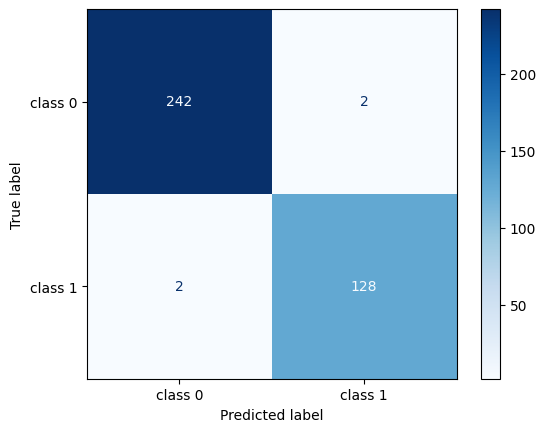

In [45]:
#Run grid search only on training set using cross-validation, n_jobs to -1, it will use all cores
start=perf_counter()
parameters={'C':np.logspace(-3,3,20), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
rlrs=RandomizedSearchCV(LogisticRegression(class_weight='balanced', solver='saga'), 
                          parameters,cv=5, n_jobs=-1, verbose=3, random_state=42)
# fit on the trainning dataset
rlrs.fit(df_X_train_stand,y_train)
tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)
print("tuned hpyerparameters :(best parameters) ",rlrs.best_params_)
print("Score:",rlrs.best_score_)
y_predrlrs = rlrs.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrs, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [46]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predrlrs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]


R_totales = pd.DataFrame()
R_aciertos =pd.DataFrame()
R_errores=  pd.DataFrame()

val='Primero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 0    244
1    130
Name: Primero, dtype: int64
Aciertos de Predicción:
 0    242
1    128
Name: Primero, dtype: int64
Errores de Predicción:
 1    2
0    2
Name: Primero, dtype: int64
Total Correctas: 370, Total Errores: 4


In [47]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predrlrs))

El coeficiente de correlacion de Matthews es de  0.9764186633039093


### Grid Search and Recursive Feature Elimination

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Elapsed time: 1.01 min.
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       244
     class 1       0.98      0.98      0.98       130

    accuracy                           0.99       374
   macro avg       0.98      0.99      0.99       374
weighted avg       0.99      0.99      0.99       374



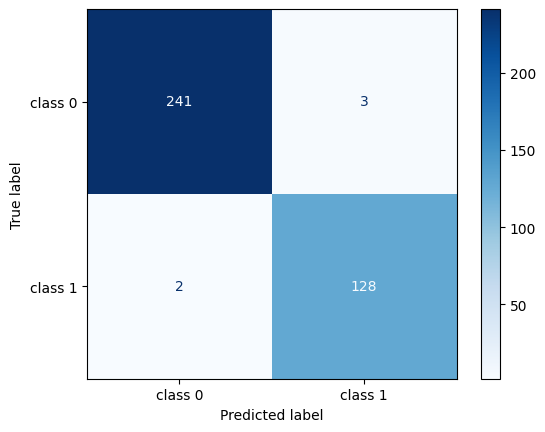

In [48]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
estimator = LogisticRegression(class_weight='balanced', solver='saga')

# Inicializar el selector RFE
selector = RFE(estimator)

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'estimator__C': np.logspace(-3, 3, 10),  # Hiperparámetro de regularización para la regresión logística
    'estimator__penalty': ["l1", "l2"],  # Tipo de penalización para la regresión logística
    'n_features_to_select': [3, 5, 10,15,20,25,30,35,40,45]  # Prueba con diferentes números de características seleccionadas
}

# Inicializar Randomized Search con Cross Validation
rlgs = GridSearchCV(selector, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
rlgs.fit(df_X_train_stand,y_train)

# Obtener el mejor modelo
best_model = rlgs.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predrlrsaa = best_model.predict(df_X_test_stand)
#performance results
print(classification_report(y_test, y_predrlrsaa, target_names=target_names))

cm = confusion_matrix(y_test, y_predrlrsaa)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()


In [49]:
# Seleccionar las características en los conjuntos de entrenamiento y prueba utilizando el mejor modelo
X_train_selected = best_model.transform(df_X_train_stand)
X_train_selected=pd.DataFrame(X_train_selected)
X_train_selected.head()


0         1         2         3         4         5         6  \
0 -0.818405  0.989404  0.179572  3.019916  1.544352  2.937704 -0.209946   
1  1.245137  1.243834  1.220991  0.157549 -0.405685 -0.282704 -0.199406   
2 -0.746000 -0.855212 -0.376390 -0.673363 -0.346281  0.023890 -0.186477   
3 -0.721865 -0.818865 -0.536273 -0.062880  0.111364 -0.022300 -0.209964   
4 -0.770135 -0.855212 -1.020752 -0.763389 -0.421677 -0.291287  0.000478   

          7         8         9  
0  0.587397 -0.398128 -0.117765  
1  1.215005 -0.398128 -0.081369  
2 -0.355295 -0.398128 -0.076648  
3 -0.708841 -0.398128 -0.107767  
4 -1.061972  2.464443 -0.170760

In [50]:
# Recuperar los nombres de las características originales
feature_names = df_X_train_stand.columns

# Recuperar los índices de las características seleccionadas
selected_feature_indices = [i for i, selected in enumerate(best_model.support_) if selected]

# Recuperar los nombres de las características seleccionadas
selected_feature_names = feature_names[selected_feature_indices]


In [51]:
X_train_selected=X_train_selected.set_axis(selected_feature_names, axis=1)

#### VIF RFE 

Revisamos la multicolinealidad de nuestras features seleccionadas por el metodo RFE

In [52]:
# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_selected.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_selected.values, i)
    for i in range(len(X_train_selected.columns))]

print(vif_datarfe)

              feature         VIF
0           min_fpktl   30.756403
1           min_bpktl   29.642308
2          mean_fpktl  126.336164
3           std_fpktl    4.898290
4           std_bpktl    1.819374
5            max_bipt    1.963411
6  flowBytesPerSecond    1.561670
7       mean_flowpktl  133.519479
8            flow_rst    1.358569
9         downUpRatio    1.087338


Observamos que se encuentran elevadas las features mean_fpktl y mean_flowpktl, procedemos a eliminar una de ellas para comprobar la multicolinealidad nuevamente

In [53]:
X_train_rfeprueba=X_train_selected.drop(['min_bpktl','min_fpktl','mean_fpktl'],axis=1) 

# VIF dataframe
vif_datarfe = pd.DataFrame()
vif_datarfe["feature"] = X_train_rfeprueba.columns

# calcular VIF de cada característica
vif_datarfe["VIF"] = [variance_inflation_factor(X_train_rfeprueba.values, i)
    for i in range(len(X_train_rfeprueba.columns))]

print(vif_datarfe)
vif_datarfe.columns

              feature       VIF
0           std_fpktl  2.516695
1           std_bpktl  1.326611
2            max_bipt  1.373883
3  flowBytesPerSecond  1.109005
4       mean_flowpktl  2.281134
5            flow_rst  1.286794
6         downUpRatio  1.010733


Index(['feature', 'VIF'], dtype='object')

Al eliminar las columnas de **mean_fpktl** y **std_flowpktl** se redujo la multicolinealidad a niveles aceptables <5, aplicamos los cambios al conjunto de entrenamiento y testing 

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [54]:
dfrfe=df_train_f.copy()
dfrfe=dfrfe.drop(['label','Ataque'],axis=1)
print(dfrfe.shape)
print("NaN, :", df_train_f['label'].isna().sum())

dfrfe = best_model.transform(dfrfe)
dfrfe=pd.DataFrame(dfrfe)
dfrfe=dfrfe.set_axis(selected_feature_names,axis=1)
dfrfe=dfrfe.drop(['min_bpktl','min_fpktl','mean_fpktl'],axis=1) 

dfrfe.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
print(dfrfe.shape)
dfrfe['label1']=df_train_f['label'].astype('int')
dfrfe['Ataque']=df_train_f['Ataque'].astype('int')
print(dfrfe.shape)

print(dfrfe.duplicated().sum())
dfrfe=dfrfe.drop_duplicates()
print("Dimensiones subconjunto RFE: ", dfrfe.shape)
print("NaN, :", dfrfe['label1'].isna().sum())

#Splitting
X_train_rfe,X_test_rfe,y_trainrfe,y_testrfe = train_test_split(dfrfe.drop(columns=['label1']), dfrfe['label1'], test_size=0.3, random_state=42)
print(X_train_rfe.shape)
X_test_rfe
RFE_train=X_train_rfe['Ataque']
RFE_test=X_test_rfe['Ataque']
print("Antes    X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
X_train_rfe=X_train_rfe.drop(['Ataque'],axis=1)
X_test_rfe=X_test_rfe.drop(['Ataque'],axis=1)
print("Despues  X_train_rfe: ", X_train_rfe.shape, "X_test_rfe: ", X_test_rfe.shape)
print("RFE_train: ", RFE_train.shape, "RFE_test: ", RFE_test.shape)

#Estandarizacion
numeric_cols = X_train_rfe.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_rfe.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_rfe)
X_train_rfe = preprocessor.transform(X_train_rfe)
X_test_rfe  = preprocessor.transform(X_test_rfe)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_rfe=pd.DataFrame(X_train_rfe,columns=labels)
X_test_rfe=pd.DataFrame(X_test_rfe,columns=labels)



(1244, 39)
NaN, : 0
(1244, 7)
(1244, 9)
10
Dimensiones subconjunto RFE:  (1234, 9)
NaN, : 0
(863, 8)
Antes    X_train_rfe:  (863, 8) X_test_rfe:  (371, 8)
Despues  X_train_rfe:  (863, 7) X_test_rfe:  (371, 7)
RFE_train:  (863,) RFE_test:  (371,)


In [55]:
print("Dimensiones trainrfe: ",X_train_rfe.shape, "y test: ", X_test_rfe.shape)
print(y_trainrfe.shape)
print(y_testrfe.shape)
X_test_rfe.head()


Dimensiones trainrfe:  (863, 7) y test:  (371, 7)
(863,)
(371,)


std_fpktl  std_bpktl  max_bipt  flowBytesPerSecond  mean_flowpktl  \
0  -0.765186  -0.419911 -0.289255           -0.210542      -1.112307   
1   0.147840  -0.397376 -0.280979           -0.203596       1.190646   
2  -0.078706   0.126874 -0.024466           -0.214025      -0.752309   
3   0.149269  -0.403514 -0.280474           -0.203673       1.165778   
4   2.170816   0.212058  2.888465           -0.214096       0.046263   

   flow_rst  downUpRatio  
0  2.616454    -0.166526  
1 -0.374274    -0.078000  
2 -0.374274    -0.105112  
3 -0.374274    -0.077394  
4 -0.374274    -0.049495

#### Entrenando modelo con RFE

In [56]:
start=perf_counter()

# Entrenar el modelo de regresión logística con las características seleccionadas y los hiperparámetros óptimos
model = LogisticRegression(C=rlgs.best_params_['estimator__C'], penalty=rlgs.best_params_['estimator__penalty'],
                           class_weight='balanced', solver='saga', max_iter=1500)
model.fit(X_train_rfe, y_trainrfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_predrlgs = model.predict(X_test_rfe)
accuracy = roc_auc_score(y_testrfe, y_predrlgs)
print("Best Parameters:", rlgs.best_params_)
print("Score:", rlgs.best_score_)

Elapsed time: 0.00 min.
Best Parameters: {'estimator__C': np.float64(46.41588833612773), 'estimator__penalty': 'l2', 'n_features_to_select': 10}
Score: 0.9908045977011495


              precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       250
     class 1       0.99      0.98      0.98       121

    accuracy                           0.99       371
   macro avg       0.99      0.99      0.99       371
weighted avg       0.99      0.99      0.99       371



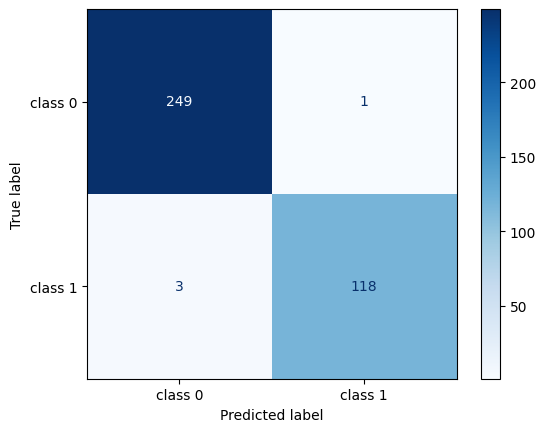

In [57]:
#performance results
print(classification_report(y_testrfe, y_predrlgs, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predrlgs)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [58]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predrlgs
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Segundo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")


Totales por clase: 
 0    250
1    121
Name: Segundo, dtype: int64
Aciertos de Predicción:
 0    249
1    118
Name: Segundo, dtype: int64
Errores de Predicción:
 1    3
0    1
Name: Segundo, dtype: int64
Total Correctas: 367, Total Errores: 4


In [59]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predrlgs))

El coeficiente de correlacion de Matthews es de  0.9754400176340648


### RL con Optuna sin RFE

In [60]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(df_X_train_stand,y_train)

    # Predice en el conjunto de prueba
    y_predrlo = rlo.predict(df_X_test_stand)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_test, y_predrlo)

    return lloss


In [61]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',random_state=42)
best_modelrlo.fit(df_X_train_stand, y_train)

# Predice en el conjunto de prueba

y_predbrlo = best_modelrlo.predict(df_X_test_stand)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Mejores hiperparámetros: {'penalty': 'l2', 'C': 0.04415498403079533}
Elapsed time: 0.20 min.


              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99       244
     class 1       0.98      0.99      0.99       130

    accuracy                           0.99       374
   macro avg       0.99      0.99      0.99       374
weighted avg       0.99      0.99      0.99       374



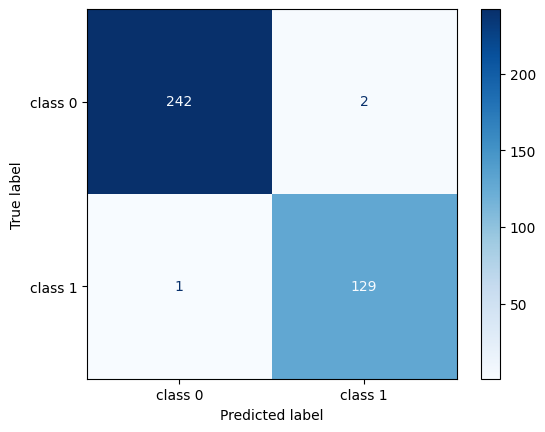

In [62]:
#performance results
print(classification_report(y_test, y_predbrlo, target_names=target_names))

cm = confusion_matrix(y_test, y_predbrlo)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_predbrlo
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Tercero'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    244
1    130
Name: Tercero, dtype: int64
Aciertos de Predicción:
 0    242
1    129
Name: Tercero, dtype: int64
Errores de Predicción:
 1    1
0    2
Name: Tercero, dtype: int64
Total Correctas: 371, Total Errores: 3


In [64]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_predbrlo))

El coeficiente de correlacion de Matthews es de  0.9823627316996303


### RL con Optuna y RFE

In [65]:
start=perf_counter()
# Define la función objetivo
def objective(trial):
    # Define el espacio de búsqueda de hiperparámetros
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform("C", 1e-2, 1000)

    # Crea el modelo con los hiperparámetros sugeridos
    rlo = LogisticRegression(penalty=penalty, C=C, solver='saga',random_state=42)

    # Entrena el modelo
    rlo.fit(X_train_rfe,y_trainrfe)

    # Predice en el conjunto de prueba
    y_predrlorfe = rlo.predict(X_test_rfe)

    # Calcula la métrica de rendimiento (recall)
    lloss = log_loss(y_testrfe, y_predrlorfe)

    return lloss


Mejores hiperparámetros: {'penalty': 'l2', 'C': 0.010315698263772554}
Elapsed time: 0.06 min.
              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99       250
     class 1       0.98      0.98      0.98       121

    accuracy                           0.99       371
   macro avg       0.99      0.99      0.99       371
weighted avg       0.99      0.99      0.99       371



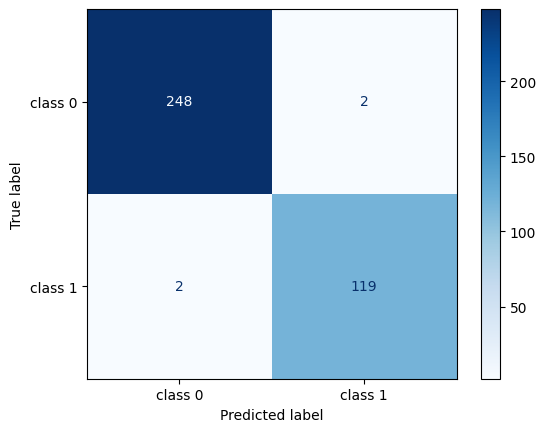

In [66]:
# Crea el estudio de optimización
optuna.logging.set_verbosity(optuna.logging.WARNING) # i do not want to see trail information
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(objective, n_trials=300)

# Obtiene los mejores hiperparámetros
best_params = study.best_params
print("Mejores hiperparámetros:", best_params)

# Entrena el modelo con los mejores hiperparámetros encontrados
best_modelrlo = LogisticRegression(**best_params, solver='saga',)
best_modelrlo.fit(X_train_rfe, y_trainrfe)

# Predice en el conjunto de prueba

y_predbrlorfe = best_modelrlo.predict(X_test_rfe)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

#performance results
print(classification_report(y_testrfe, y_predbrlorfe, target_names=target_names))

cm = confusion_matrix(y_testrfe, y_predbrlorfe)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [67]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predbrlorfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Cuarto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    250
1    121
Name: Cuarto, dtype: int64
Aciertos de Predicción:
 0    248
1    119
Name: Cuarto, dtype: int64
Errores de Predicción:
 1    2
0    2
Name: Cuarto, dtype: int64
Total Correctas: 367, Total Errores: 4


In [68]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predbrlorfe))

El coeficiente de correlacion de Matthews es de  0.9754710743801653


## Decision Tree

### Sin Feature Importances

In [69]:
start=perf_counter()

# Defining an object for DTC and fitting for whole dataset
dt = DecisionTreeClassifier(random_state=42)
dt.fit(df_X_train_stand, y_train)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


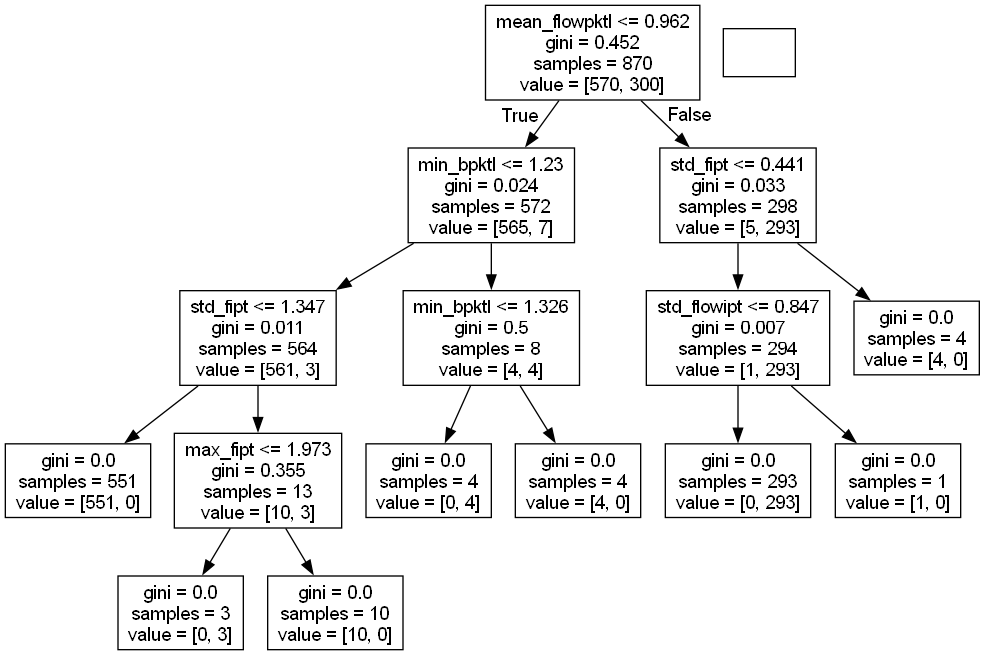

In [70]:
# Conjunto de variables predictoras
X = df_train_f.copy()
X.drop(['label', 'Ataque'],axis=1,inplace=True)

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [71]:
# Testing model
y_preddt = dt.predict(df_X_test_stand)
y_probdt = dt.predict_proba(df_X_test_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddt, y_test))

Accuracy of Decision Tree-Test:  0.9866310160427807


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       244
           1       0.98      0.98      0.98       130

    accuracy                           0.99       374
   macro avg       0.98      0.99      0.99       374
weighted avg       0.99      0.99      0.99       374



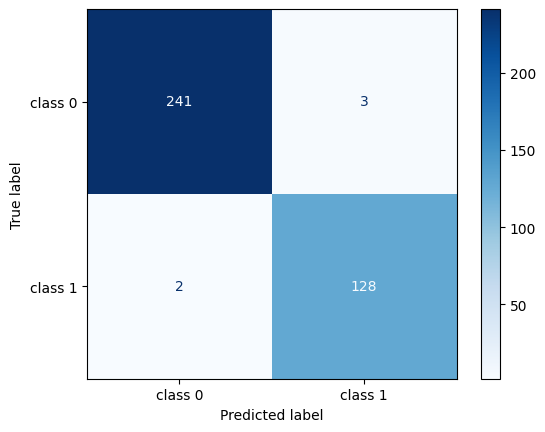

In [72]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_preddt))
ConfusionMatrixDisplay.from_predictions(y_test, y_preddt, display_labels=target_names, cmap=plt.cm.Blues)

In [73]:
df_resultados = pd.DataFrame({
    'Clase': A_test,
    'Real': y_test,
    'Predicción': y_preddt
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    244
1    130
Name: Quinto, dtype: int64
Aciertos de Predicción:
 0    241
1    128
Name: Quinto, dtype: int64
Errores de Predicción:
 1    2
0    3
Name: Quinto, dtype: int64
Total Correctas: 369, Total Errores: 5


In [74]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_test, y_preddt))

El coeficiente de correlacion de Matthews es de  0.9705930090684264


### Con Feature Importances

Calculamos la `feature_iportances_` obtenida con el modelo anterior

In [75]:
df_X_test_stand.columns[:]

Index(['flowduration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'total_fipt',
       'total_bipt', 'min_fipt', 'min_bipt', 'max_fipt', 'max_bipt',
       'mean_fipt', 'mean_bipt', 'std_fipt', 'std_bipt', 'fpsh_cnt',
       'bpsh_cnt', 'total_fhlen', 'total_bhlen', 'fPktsPerSecond',
       'bPktsPerSecond', 'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl',
       'mean_flowipt', 'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst',
       'flow_ack', 'downUpRatio'],
      dtype='object')

In [76]:
feature_importances = dt.feature_importances_
feature_importances = pd.DataFrame([feature_importances], columns=df_X_test_stand.columns[:])


Creamos un duplicado de nuestros conjuntos de entrenamiento y testing

In [77]:
feature_importances


flowduration  total_fpackets  total_bpackets  total_fpktl  total_bpktl  \
0           0.0             0.0             0.0          0.0          0.0   

   min_fpktl  min_bpktl  max_fpktl  max_bpktl  mean_fpktl  mean_bpktl  \
0        0.0   0.019996        0.0        0.0         0.0         0.0   

   std_fpktl  std_bpktl  total_fipt  total_bipt  min_fipt  min_bipt  max_fipt  \
0        0.0        0.0         0.0         0.0       0.0       0.0  0.011741   

   max_bipt  mean_fipt  mean_bipt  std_fipt  std_bipt  fpsh_cnt  bpsh_cnt  \
0       0.0        0.0        0.0  0.023382       0.0       0.0       0.0   

   total_fhlen  total_bhlen  fPktsPerSecond  bPktsPerSecond  \
0          0.0          0.0             0.0             0.0   

   flowBytesPerSecond  mean_flowpktl  std_flowpktl  mean_flowipt  std_flowipt  \
0                 0.0        0.93981           0.0           0.0      0.00507   

   flow_fin  flow_syn  flow_rst  flow_ack  downUpRatio  
0       0.0       0.0       0.0       0.0          0.0

Ordenamos por importancia

In [78]:
feature_importances_transposed = feature_importances.transpose()

# Renombrar la columna
feature_importances_transposed.columns = ['importance']

# Ordenar las características de mayor a menor importancia
sorted_features = feature_importances_transposed.sort_values(by='importance', ascending=False)

sorted_features=sorted_features.transpose()
sorted_features

mean_flowpktl  std_fipt  min_bpktl  max_fipt  std_flowipt  \
importance        0.93981  0.023382   0.019996  0.011741      0.00507   

            total_fpackets  flowduration  min_fpktl  total_bpktl  total_fpktl  \
importance             0.0           0.0        0.0          0.0          0.0   

            total_bpackets  std_fpktl  std_bpktl  max_fpktl  max_bpktl  \
importance             0.0        0.0        0.0        0.0        0.0   

            total_bipt  total_fipt  min_bipt  min_fipt  max_bipt  mean_fipt  \
importance         0.0         0.0       0.0       0.0       0.0        0.0   

            mean_fpktl  mean_bpktl  std_bipt  mean_bipt  total_fhlen  \
importance         0.0         0.0       0.0        0.0          0.0   

            fpsh_cnt  total_bhlen  fPktsPerSecond  bPktsPerSecond  bpsh_cnt  \
importance       0.0          0.0             0.0             0.0       0.0   

            flowBytesPerSecond  std_flowpktl  mean_flowipt  flow_fin  \
importance                 0.0           0.0           0.0       0.0   

            flow_syn  flow_rst  flow_ack  downUpRatio  
importance       0.0       0.0       0.0          0.0

Aplicamos el siguiente ciclo for para eliminar las columnas con una importancia de 0

In [79]:
Xfitrain = pd.DataFrame()
Xfitest  = pd.DataFrame()
fidt     = pd.DataFrame()
dffi     = pd.DataFrame()

ncol=feature_importances.shape[1]

for i in range(0, ncol):
    if(feature_importances.at[0,feature_importances.columns[i]]>0):
        Xfitrain[feature_importances.columns[i]]= df_X_train_stand[feature_importances.columns[i]]
        Xfitest[feature_importances.columns[i]]= df_X_test_stand[feature_importances.columns[i]]
        dffi[feature_importances.columns[i]]= df_train_f[feature_importances.columns[i]]
        fidt[feature_importances.columns[i]] = feature_importances[feature_importances.columns[i]]

print(feature_importances.shape)
fidt

(1, 39)


min_bpktl  max_fipt  std_fipt  mean_flowpktl  std_flowipt
0   0.019996  0.011741  0.023382        0.93981      0.00507

#### VIF Feature Importance

A las features clasificadas con el metodo `feature_iportances_` le calculamos la multicolinealidad por medio de `VIF`

In [80]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xfitrain.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(Xfitrain.values, i)
    for i in range(len(Xfitrain.columns))]

print(vif_data)

         feature       VIF
0      min_bpktl  8.407218
1       max_fipt  4.661649
2       std_fipt  3.470070
3  mean_flowpktl  8.388620
4    std_flowipt  4.029257


Observamos niveles altos de multicolinealidad, procedemos a eliminar de manera manual las features con niveles altos de VIF y bajos niveles de importancia

In [81]:
sorted_features

mean_flowpktl  std_fipt  min_bpktl  max_fipt  std_flowipt  \
importance        0.93981  0.023382   0.019996  0.011741      0.00507   

            total_fpackets  flowduration  min_fpktl  total_bpktl  total_fpktl  \
importance             0.0           0.0        0.0          0.0          0.0   

            total_bpackets  std_fpktl  std_bpktl  max_fpktl  max_bpktl  \
importance             0.0        0.0        0.0        0.0        0.0   

            total_bipt  total_fipt  min_bipt  min_fipt  max_bipt  mean_fipt  \
importance         0.0         0.0       0.0       0.0       0.0        0.0   

            mean_fpktl  mean_bpktl  std_bipt  mean_bipt  total_fhlen  \
importance         0.0         0.0       0.0        0.0          0.0   

            fpsh_cnt  total_bhlen  fPktsPerSecond  bPktsPerSecond  bpsh_cnt  \
importance       0.0          0.0             0.0             0.0       0.0   

            flowBytesPerSecond  std_flowpktl  mean_flowipt  flow_fin  \
importance                 0.0           0.0           0.0       0.0   

            flow_syn  flow_rst  flow_ack  downUpRatio  
importance       0.0       0.0       0.0          0.0

In [82]:
X_fi_prueba=Xfitrain.drop([], axis=1) 

In [83]:
X_fi_prueba.columns

Index(['min_bpktl', 'max_fipt', 'std_fipt', 'mean_flowpktl', 'std_flowipt'], dtype='object')

In [84]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_fi_prueba.columns

# calcular VIF de cada característica
vif_data["VIF"] = [variance_inflation_factor(X_fi_prueba.values, i)
    for i in range(len(X_fi_prueba.columns))]

print(vif_data)

         feature       VIF
0      min_bpktl  8.407218
1       max_fipt  4.661649
2       std_fipt  3.470070
3  mean_flowpktl  8.388620
4    std_flowipt  4.029257


Reduciendo asi los valores a niveles aceptables de multicolinealidad <5

Dado que se redujeron las features volvemos a realizar el preprocesamiento de los datos para descartar datos duplicados.

In [85]:
dffi=dffi.drop([], axis=1) 
print(dffi.shape)


dffi.reset_index(drop=True, inplace=True)
df_train_f.reset_index(drop=True, inplace=True)
dffi['label']=df_train_f['label'].astype('int')
print("NaN, :", df_train_f['label'].isna().sum())
print("NaNd, :", dffi['label'].isna().sum())

print(dffi.shape)
dffi['Ataque']=df_train_f['Ataque']
print("Con Ataque ", dffi.shape)

print(dffi.duplicated().sum())
dffi=dffi.drop_duplicates()
print("Dimensiones suboconjunto Fi: ", dffi.shape)
print("NaN, :", dffi['label'].isna().sum())

#Splitting
X_train_fi,X_test_fi,y_trainfi,y_testfi = train_test_split(dffi.drop(columns=['label']), dffi['label'], test_size=0.3, random_state=42)

print("Antes X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
FI_train=X_train_fi['Ataque']
X_train_fi=X_train_fi.drop(['Ataque'],axis=1)
FI_test=X_test_fi['Ataque']
X_test_fi=X_test_fi.drop(['Ataque'],axis=1)
print("Despues X_train_fi: ", X_train_fi.shape, "X_test_fi: ", X_test_fi.shape)
print("Con FI_train: ", FI_train.shape, "FI_test: ", FI_test.shape)

#Estandarizacion
numeric_cols = X_train_fi.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

labels=list(X_train_fi.columns.values.tolist())
# fit on the trainning dataset
preprocessor.fit_transform(X_train_fi)
X_train_fi = preprocessor.transform(X_train_fi)
X_test_fi  = preprocessor.transform(X_test_fi)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.
X_train_fi=pd.DataFrame(X_train_fi,columns=labels)
X_test_fi=pd.DataFrame(X_test_fi,columns=labels)

collections.Counter(dffi.Ataque)


(1244, 5)
NaN, : 0
NaNd, : 0
(1244, 6)
Con Ataque  (1244, 7)
173
Dimensiones suboconjunto Fi:  (1071, 7)
NaN, : 0
Antes X_train_fi:  (749, 6) X_test_fi:  (322, 6)
Despues X_train_fi:  (749, 5) X_test_fi:  (322, 5)
Con FI_train:  (749,) FI_test:  (322,)


Counter({0: 656, 1: 415})

In [86]:
print("Subconjunto Recursive Feature Elimination (RFE): ",dfrfe.shape)
print("Subconjunto Feature Importance (FI): ",dffi.shape)

Subconjunto Recursive Feature Elimination (RFE):  (1234, 9)
Subconjunto Feature Importance (FI):  (1071, 7)


In [87]:
print("Nuevas dimensiones conjunto train: ", X_train_fi.shape, "y test: ", X_test_fi.shape)

Nuevas dimensiones conjunto train:  (749, 5) y test:  (322, 5)


In [88]:
X_train_fi.head()

min_bpktl  max_fipt  std_fipt  mean_flowpktl  std_flowipt
0  -0.914758  0.339817  0.445743      -0.940495     0.283235
1  -0.914758  0.339638  0.422842      -0.761083     0.432470
2   1.132085 -0.359217 -0.317264       0.907672    -0.361850
3  -0.914758 -0.305414 -0.306016      -0.497823    -0.383387
4   1.181460 -0.355136 -0.288851       1.513155    -0.364042

Con esto, volvemos a entrenar el modelo DecisionTree

In [89]:
start=perf_counter()


dtfi = DecisionTreeClassifier(random_state=42)
dtfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

Elapsed time: 0.00 min.


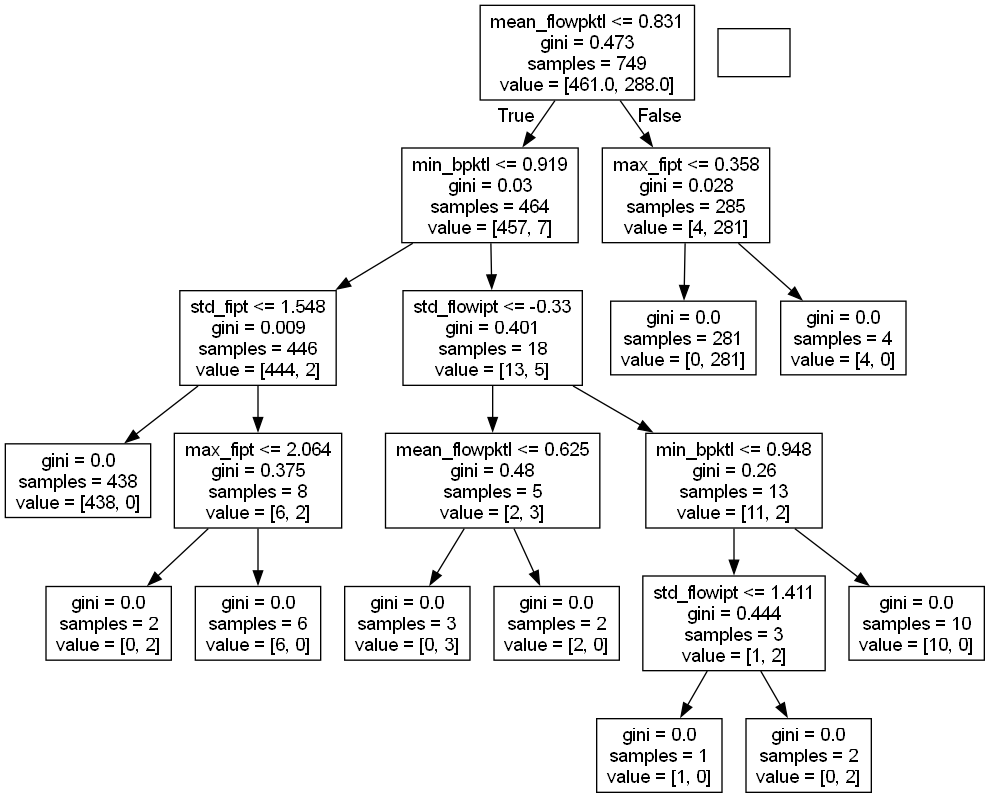

In [90]:
features = X_train_fi.columns
dot_data = export_graphviz(dtfi, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [91]:
# Testing model
y_preddtfi = dtfi.predict(X_test_fi)
y_probdtfi = dtfi.predict_proba(X_test_fi)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddtfi, y_testfi))

Accuracy of Decision Tree-Test:  0.9782608695652174


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.98      0.97      0.97       127

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



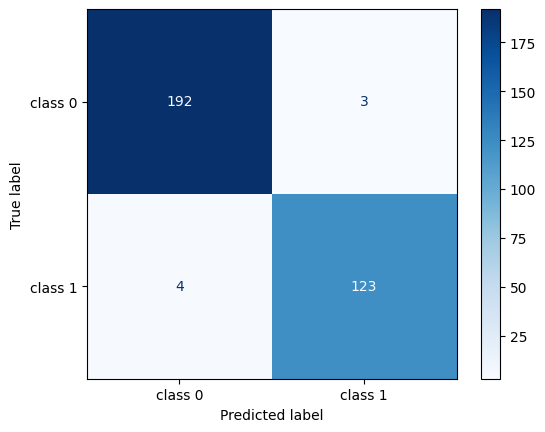

In [92]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtfi, display_labels=target_names, cmap=plt.cm.Blues)

In [93]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Sexto'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Sexto, dtype: int64
Aciertos de Predicción:
 0    192
1    123
Name: Sexto, dtype: int64
Errores de Predicción:
 1    4
0    3
Name: Sexto, dtype: int64
Total Correctas: 315, Total Errores: 7


In [94]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtfi))

El coeficiente de correlacion de Matthews es de  0.9544498885299045


Con la seleccion de features aumentamos la Accuracy del modelo de **0.9635** a **0.9673**, procedemos a implementar tecnicas de optimizacion de hiperparametros buscando hacer el modelo mas eficiente

### DT optimization 

Los hiperparametros que se pueden ajustar en los Arboles de Decision son los siguientes
- min_samples_split – Minimum number of samples a node must possess before splitting.
- min_samples_leaf – Minimum number of samples a leaf node must possess.
- min_weight_fraction_leaf – Minimum fraction of the sum total of weights required to be at a leaf node.
- max_leaf_nodes – Maximum number of leaf nodes a decision tree can have.
- max_features – Maximum number of features that are taken into the account for splitting each node.


In [95]:
# Hyperparameter Tuning of DTC
start=perf_counter()

dtop = DecisionTreeClassifier(class_weight='balanced',random_state=42)

params = {'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth' : ['None',2,3,4,5],
          'min_samples_split': [2,3,4,5],
          'min_samples_leaf': [1,2,3,4,5]}

gsearchdtop = GridSearchCV(dtop, param_grid=params, n_jobs=-1, cv=5)

gsearchdtop.fit(X_train_fi, y_trainfi)

print("Best Parameters:", gsearchdtop.best_params_)

mdtop = DecisionTreeClassifier(criterion=gsearchdtop.best_params_['criterion'], max_depth=gsearchdtop.best_params_['max_depth'], min_samples_split=gsearchdtop.best_params_['min_samples_split'], min_samples_leaf=gsearchdtop.best_params_['min_samples_leaf'], 
                           class_weight='balanced',random_state=42)
mdtop.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Predecir y evaluar el modelo
y_preddtop = mdtop.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_preddtop)
print("Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Elapsed time: 0.02 min.
Accuracy: 0.9782608695652174


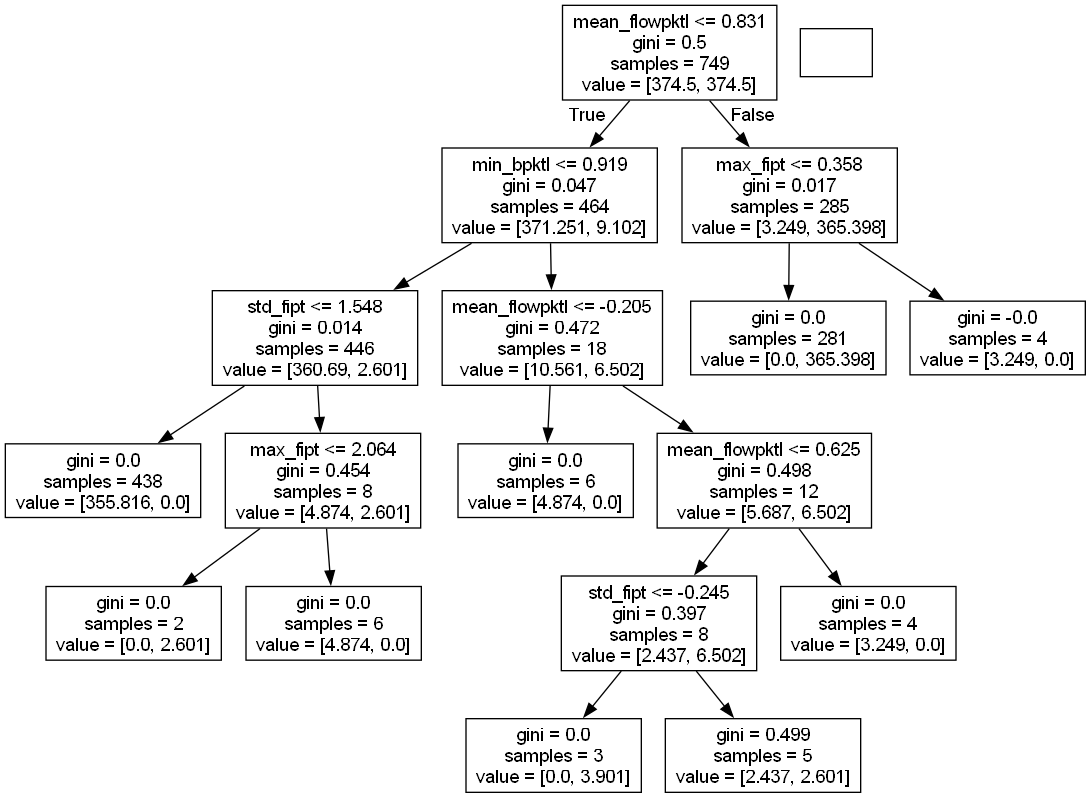

In [96]:
features = X_train_fi.columns
dot_data = export_graphviz(mdtop, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.98      0.97      0.97       127

    accuracy                           0.98       322
   macro avg       0.98      0.98      0.98       322
weighted avg       0.98      0.98      0.98       322



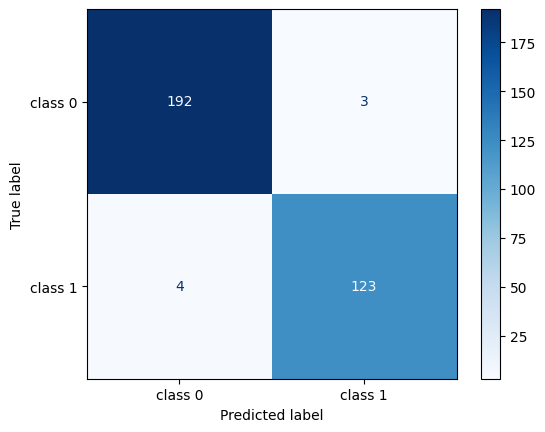

In [97]:
#Classification for test before hyperparameter tuning
print(classification_report(y_testfi,y_preddtop))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_preddtop, display_labels=target_names, cmap=plt.cm.Blues)

In [98]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_preddtop
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Septimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Septimo, dtype: int64
Aciertos de Predicción:
 0    192
1    123
Name: Septimo, dtype: int64
Errores de Predicción:
 1    4
0    3
Name: Septimo, dtype: int64
Total Correctas: 315, Total Errores: 7


In [99]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_preddtop))

El coeficiente de correlacion de Matthews es de  0.9544498885299045


## XGBoost

### XGBoost con RFE

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 1.40 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.505), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(2), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(464), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9930568624815163
Classification Report:
               precision    recall  f1-sc

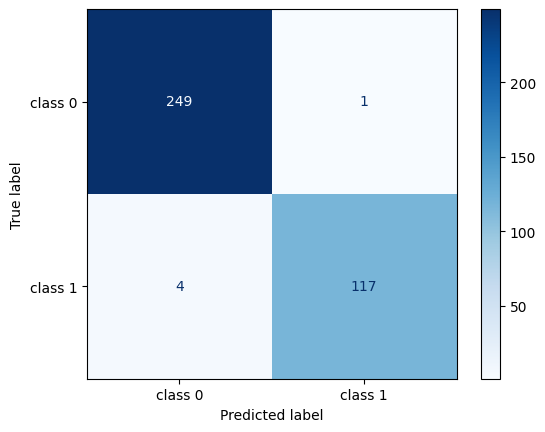

In [100]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':["binary:logistic","binary:logitraw","binary:hinge"],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbrfe = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbrfe.fit(X_train_rfe, y_trainrfe)

# Obtener el mejor modelo
best_xgbmodelrfe = grid_xgbrfe.best_estimator_


tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Predecir y evaluar el modelo
y_predxgbrfe = grid_xgbrfe.predict(X_test_rfe)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(y_testrfe, y_predxgbrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predxgbrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [101]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predxgbrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Octavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    250
1    121
Name: Octavo, dtype: int64
Aciertos de Predicción:
 0    249
1    117
Name: Octavo, dtype: int64
Errores de Predicción:
 1    4
0    1
Name: Octavo, dtype: int64
Total Correctas: 366, Total Errores: 5


In [102]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predxgbrfe))

El coeficiente de correlacion de Matthews es de  0.9693076086967123


### XGB con FI

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Elapsed time: 1.25 min.
Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.17500000000000002), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(3), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(166), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9919821029082774
Classification Report:
               precision   

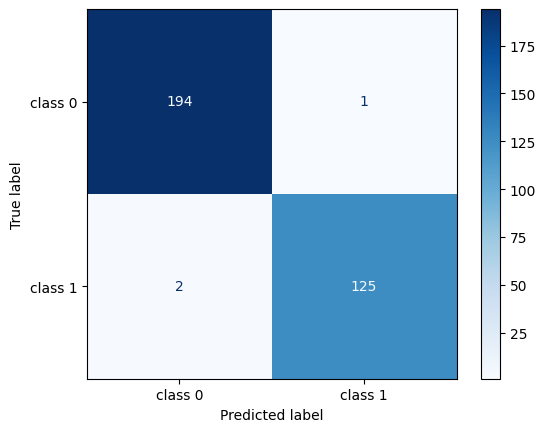

In [103]:
start=perf_counter()
# Definir el estimador base para la regresión logística con selección de características RFE
selectxg = XGBClassifier()

# Inicializar el selector RFE

# Definir el espacio de búsqueda de parámetros para Randomized Search
parameters = {
    'objective':['binary:logistic','binary:logitraw','binary:hinge'],
    'n_estimators': np.logspace(2, 3, 10).astype(int),
    'max_depth': np.arange(2,10),
    'learning_rate': np.linspace(0.01, 1, 7)
   }

# Inicializar Randomized Search con Cross Validation
grid_xgbfi = GridSearchCV(selectxg, parameters, cv=5, n_jobs=-1, verbose=3)

# Ajustar Randomized Search a los datos de entrenamiento
grid_xgbfi.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)


# Obtener el mejor modelo
best_xgbmodelfi = grid_xgbfi.best_estimator_


# Predecir y evaluar el modelo
y_predxgbfi = grid_xgbfi.predict(X_test_fi)
accuracy = accuracy_score(y_testfi, y_predxgbfi)
print("Best Parameters:", best_xgbmodelfi)
print("Score:", grid_xgbfi.best_score_)
print("Classification Report:\n", classification_report(y_testfi, y_predxgbfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predxgbfi, display_labels=target_names, cmap=plt.cm.Blues)

In [104]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predxgbfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Noveno'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Noveno, dtype: int64
Aciertos de Predicción:
 0    194
1    125
Name: Noveno, dtype: int64
Errores de Predicción:
 1    2
0    1
Name: Noveno, dtype: int64
Total Correctas: 319, Total Errores: 3


In [105]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predxgbfi))

El coeficiente de correlacion de Matthews es de  0.9804906328195698


## Random Forest

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Elapsed time: 0.47 min.
Mejor modelo accuracy score: 0.9876
Mejores parámetros:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(20)}
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.98      0.98      0.98       127

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



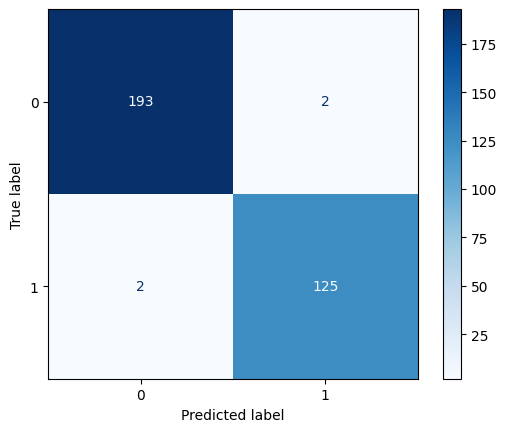

In [106]:

start=perf_counter()

# Define el modelo base a optimizar
clfrf = RandomForestClassifier(random_state=42)

# Define el espacio de búsqueda de parámetros
param_gridrf = {
    'n_estimators': np.linspace(20, 500, 7).astype(int),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth' : [4,6,8,10],  # Máxima profundidad de cada árbol
    'criterion' :['gini', 'entropy']  # Medidas de calidad de la división
}

# Crear objeto GridSearchCV
grid_searchrf = GridSearchCV(estimator=clfrf, param_grid=param_gridrf, cv=5, verbose=3, n_jobs=-1)

# Entrenarlo
grid_searchrf.fit(X_train_fi, y_trainfi)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

# Mejor modelo encontrado
best_clfrf = grid_searchrf.best_estimator_

# Predicciones con el mejor modelo
y_predrf = best_clfrf.predict(X_test_fi)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(y_testfi, y_predrf)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(y_testfi, y_predrf))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(y_testfi, y_predrf, cmap=plt.cm.Blues);

In [107]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predrf
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Decimo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Decimo, dtype: int64
Aciertos de Predicción:
 0    193
1    125
Name: Decimo, dtype: int64
Errores de Predicción:
 1    2
0    2
Name: Decimo, dtype: int64
Total Correctas: 318, Total Errores: 4


In [108]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predrf))

El coeficiente de correlacion de Matthews es de  0.9739955582475267


## Support Vector Machine

### Con Feature Selection de **RFE**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(1.0)}
Elapsed time: 0.00 min.
Accuracy: 0.9892183288409704
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       250
           1       0.98      0.98      0.98       121

    accuracy                           0.99       371
   macro avg       0.99      0.99      0.99       371
weighted avg       0.99      0.99      0.99       371



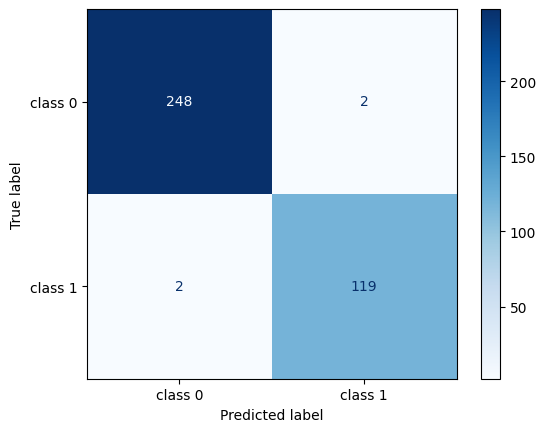

In [109]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 3),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmrfe = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmrfe.fit(X_train_rfe, y_trainrfe)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmrfe.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmrfe = grid_searchsvmrfe.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmrfe = best_modelsvmrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_predsvmrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_predsvmrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predsvmrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [110]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predsvmrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Onceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    250
1    121
Name: Onceavo, dtype: int64
Aciertos de Predicción:
 0    248
1    119
Name: Onceavo, dtype: int64
Errores de Predicción:
 1    2
0    2
Name: Onceavo, dtype: int64
Total Correctas: 367, Total Errores: 4


In [111]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predsvmrfe))

El coeficiente de correlacion de Matthews es de  0.9754710743801653


### Con Feature Selection **FI**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'C': np.float64(1000.0)}
Elapsed time: 0.00 min.
Accuracy: 0.984472049689441
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       195
           1       0.97      0.99      0.98       127

    accuracy                           0.98       322
   macro avg       0.98      0.99      0.98       322
weighted avg       0.98      0.98      0.98       322



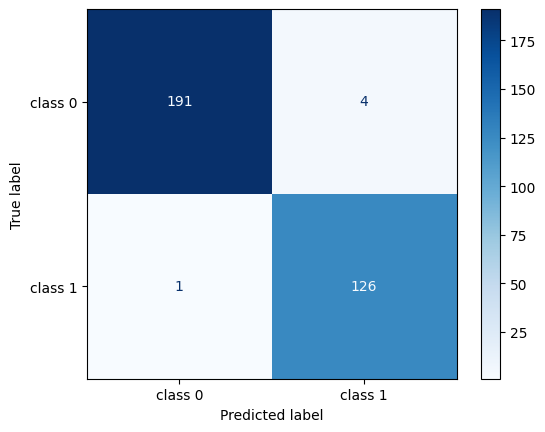

In [112]:
start=perf_counter()

svm = SVC()
# Definir los parámetros para la búsqueda de malla
param_grid = {
    'C': np.logspace(-3, 3, 3),
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}
# Realizar la búsqueda de malla con validación cruzada
grid_searchsvmdt = RandomizedSearchCV(svm, param_grid, refit=True, verbose=3, n_jobs=-1, cv=5, random_state=42)
grid_searchsvmdt.fit(X_train_fi, y_trainfi)
# Imprimir los mejores parámetros encontrados
print("Best Parameters:", grid_searchsvmdt.best_params_)
# Usar el mejor modelo encontrado para hacer predicciones
best_modelsvmdt = grid_searchsvmdt.best_estimator_

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

y_predsvmfi = best_modelsvmdt.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_predsvmfi))
print("Classification Report:\n", classification_report(y_testfi, y_predsvmfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predsvmfi, display_labels=target_names, cmap=plt.cm.Blues)


In [113]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predsvmfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Doceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Doceavo, dtype: int64
Aciertos de Predicción:
 0    191
1    126
Name: Doceavo, dtype: int64
Errores de Predicción:
 1    1
0    4
Name: Doceavo, dtype: int64
Total Correctas: 317, Total Errores: 5


In [114]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predsvmfi))

El coeficiente de correlacion de Matthews es de  0.9678103578996392


## Naive Bayes

### Con RFE

Accuracy: 0.954177897574124
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       250
           1       0.98      0.88      0.93       121

    accuracy                           0.95       371
   macro avg       0.96      0.93      0.95       371
weighted avg       0.96      0.95      0.95       371

El coeficiente de correlacion de Matthews es de  0.8957961725436787


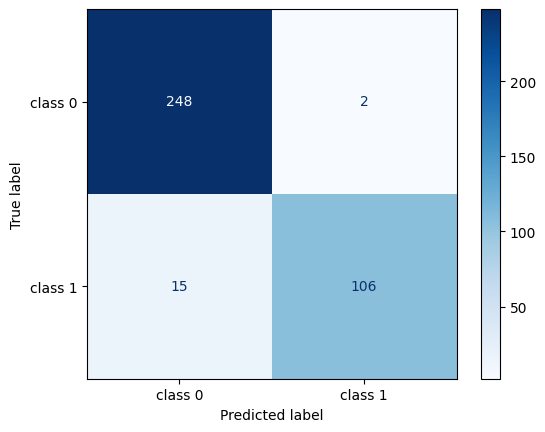

In [115]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnvrfe=GaussianNB()


clfnvrfe.fit(X_train_rfe, y_trainrfe)

y_prednvrfe=clfnvrfe.predict(X_test_rfe)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testrfe, y_prednvrfe))
print("Classification Report:\n", classification_report(y_testrfe, y_prednvrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_prednvrfe, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_prednvrfe))


In [116]:
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_prednvrfe
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Treceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    250
1    121
Name: Treceavo, dtype: int64
Aciertos de Predicción:
 0    248
1    106
Name: Treceavo, dtype: int64
Errores de Predicción:
 1    15
0     2
Name: Treceavo, dtype: int64
Total Correctas: 354, Total Errores: 17


### Con FI

Accuracy: 0.9906832298136646
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.98      0.99      0.99       127

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322

El coeficiente de correlacion de Matthews es de  0.9805440727120666


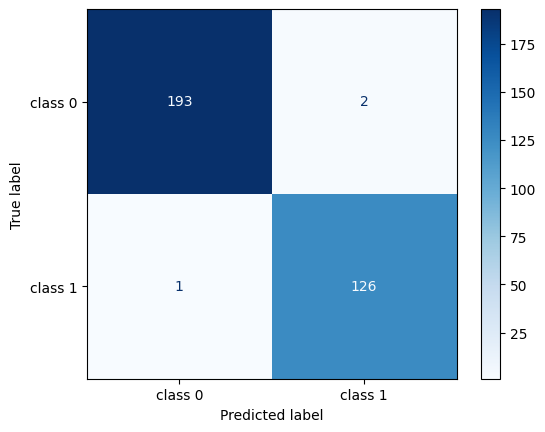

In [117]:
#Creamos el clasificado con GaussianNB, para features con valores continuos
clfnv = GaussianNB()
clfnv.fit(X_train_fi, y_trainfi)

y_prednvfi=clfnv.predict(X_test_fi)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_testfi, y_prednvfi))
print("Classification Report:\n", classification_report(y_testfi, y_prednvfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_prednvfi, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_prednvfi))

In [118]:
df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_prednvfi
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Catorceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Catorceavo, dtype: int64
Aciertos de Predicción:
 0    193
1    126
Name: Catorceavo, dtype: int64
Errores de Predicción:
 1    1
0    2
Name: Catorceavo, dtype: int64
Total Correctas: 319, Total Errores: 3


## Ann

### Optuna y RFE

In [119]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_rfe.shape[1]

#Creo el modelo
best_modelfrnrfe= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrn, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelfrnrfe

    #Callback
    callback= EarlyStopping(monitor='loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrn.fit(X_train_rfe, y_trainrfe, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrn.evaluate(X_test_rfe, y_testrfe, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelfrnrfe = modelrn  # Almacena el modelo si es el mejor hasta ahora
    
    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  2 units per layer:  [768, 512]
Capas  6 units per layer:  [512, 768, 768, 256, 768, 512]
Capas  4 units per layer:  [512, 512, 1024, 512]
Capas  7 units per layer:  [512, 768, 512, 256, 1024, 512, 768]
Capas  1 units per layer:  [512]
Capas  7 units per layer:  [256, 256, 1024, 768, 256, 1024, 512]
Capas  1 units per layer:  [256]
Capas  3 units per layer:  [256, 1024, 1024]
Capas  5 units per layer:  [768, 256, 768, 1024, 768]
Capas  4 units per layer:  [256, 256, 512, 1024]
Capas  8 units per layer:  [1024, 1024, 256, 256, 512, 256, 1024, 512]
Capas  6 units per layer:  [256, 768, 768, 768, 256, 1024]
Capas  6 units per layer:  [512, 512, 1024, 512, 256, 1024]
Capas  8 units per layer:  [768, 768, 768, 768, 768, 768, 256, 1024]
Capas  6 units per layer:  [256, 256, 1024, 512, 512, 512]
Capas  7 units per layer:  [512, 768, 768, 768, 1024, 768, 256]
Capas  5 units per layer:  [1024, 512, 512, 256, 512]
Capas  7 units per layer:  [256, 1024, 1024, 768, 768, 256, 512]
Capas  8 un

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       250
           1       0.99      0.98      0.99       121

    accuracy                           0.99       371
   macro avg       0.99      0.99      0.99       371
weighted avg       0.99      0.99      0.99       371



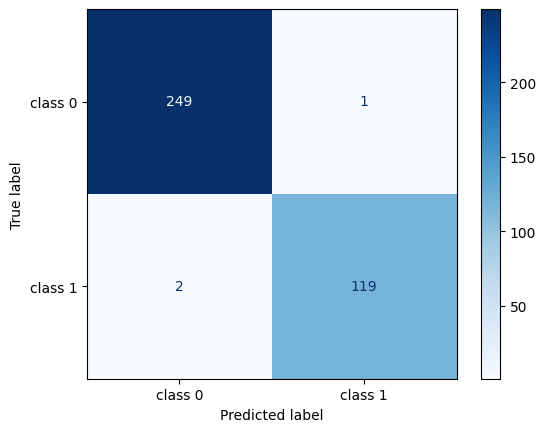

In [120]:
y_pred_probarfe = best_modelfrnrfe.predict(X_test_rfe)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfe = (y_pred_probarfe > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testrfe, y_predfrnrfe))
ConfusionMatrixDisplay.from_predictions(y_testrfe, y_predfrnrfe, display_labels=target_names, cmap=plt.cm.Blues)

In [121]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testrfe, y_predfrnrfe))

El coeficiente de correlacion de Matthews es de  0.9815825309333545


In [122]:
y_predfrnrfe_flat=y_predfrnrfe.flatten()
df_resultados = pd.DataFrame({
    'Clase': RFE_test,
    'Real': y_testrfe,
    'Predicción': y_predfrnrfe_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Quinceavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    250
1    121
Name: Quinceavo, dtype: int64
Aciertos de Predicción:
 0    249
1    119
Name: Quinceavo, dtype: int64
Errores de Predicción:
 1    2
0    1
Name: Quinceavo, dtype: int64
Total Correctas: 368, Total Errores: 3


### Optuna y FI

In [123]:
start=perf_counter()

# Extraemos el número de features
num_features = X_train_fi.shape[1]

#Creo el modelo
best_modelrnfi= None

def build_model(trial):
    # Inicializa la lista de capas
    num_layers = trial.suggest_int('num_layers', 1, 8)
    units_per_layer = [trial.suggest_int(f'units_layer_{i}', 256, 1024,256) for i in range(num_layers)]
    #dropout_rate = [trial.suggest_uniform(f'dropout_rate_{i}', 0.0, 0.2) for i in range(num_layers)]
    activators= [trial.suggest_categorical(f'activator_{i}', ['relu', 'leaky_relu', 'tanh']) for i in range(num_layers)]
    kernelinit= [trial.suggest_categorical(f'kernelinit_{i}',['HeNormal','HeUniform','GlorotNormal','GlorotUniform']) for i in range(num_layers)]
    print("Capas ", num_layers, "units per layer: ", units_per_layer)
    # Determina el número de épocas y el tamaño del lote (batch size)
    num_epochs = trial.suggest_int('num_epochs', 10, 50,10)
    batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32])
    
    # Construye el modelo
    model = Sequential()
    model.add(Dense(units_per_layer[0], activation=activators[0], kernel_initializer=kernelinit[0], input_shape=(num_features,)))
    #model.add(Dropout(dropout_rate[0]))
    
    # Añade las capas ocultas
    for i in range(1,num_layers):
        model.add(Dense(units_per_layer[i], activation=activators[i], kernel_initializer=kernelinit[i]))
        
        #model.add(Dropout(dropout_rate[i])) 
        
    
    # Capa de salida
    model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    # Compila el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model, num_epochs, batch_size

def objective(trial):
    # Construye y compila el modelo
    modelrnfi, num_epochs, batch_size = build_model(trial)
    
    #Cargo el best_model 
    global best_modelrnfi

    #Callback
    callback= EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)
    # Entrena el modelo
    modelrnfi.fit(X_train_fi, y_trainfi, epochs=num_epochs, batch_size=batch_size, verbose=0, callbacks=[callback])
    
    # Evalúa el modelo
    score = modelrnfi.evaluate(X_test_fi, y_testfi, verbose=0)
    
    # Si no hay un trial registrado o si el modelo actual es mejor, almacénalo en 'best_model'
    if trial.number == 0 or score[1] > trial.study.best_value:
        best_modelrnfi = modelrnfi  # Almacena el modelo si es el mejor hasta ahora

    return score[1]

# Crea un estudio de Optuna
studyrn = optuna.create_study(direction='maximize')
studyrn.optimize(objective, n_trials=100, show_progress_bar=True)

tl=(perf_counter()-start)/60
print ('Elapsed time: %.2f min.' %tl)

  0%|          | 0/100 [00:00<?, ?it/s]

Capas  6 units per layer:  [512, 768, 1024, 1024, 512, 512]
Capas  3 units per layer:  [1024, 1024, 256]
Capas  2 units per layer:  [256, 768]
Capas  2 units per layer:  [512, 1024]
Capas  7 units per layer:  [768, 256, 512, 256, 768, 512, 256]
Capas  6 units per layer:  [768, 256, 1024, 512, 512, 256]
Capas  2 units per layer:  [1024, 256]
Capas  7 units per layer:  [1024, 256, 1024, 1024, 768, 256, 768]
Capas  5 units per layer:  [768, 768, 1024, 768, 256]
Capas  5 units per layer:  [768, 512, 1024, 768, 768]
Capas  8 units per layer:  [256, 512, 512, 256, 1024, 1024, 256, 1024]
Capas  8 units per layer:  [512, 768, 512, 256, 512, 512, 256, 256]
Capas  8 units per layer:  [512, 512, 512, 256, 1024, 768, 256, 256]
Capas  7 units per layer:  [512, 768, 256, 256, 256, 512, 256]
Capas  8 units per layer:  [768, 512, 512, 512, 512, 768, 512, 256]
Capas  4 units per layer:  [256, 1024, 768, 512]
Capas  7 units per layer:  [512, 256, 768, 256, 768, 512, 1024]
Capas  6 units per layer:  [768

In [124]:
X_test_fi.shape

(322, 5)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.98      1.00      0.99       127

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



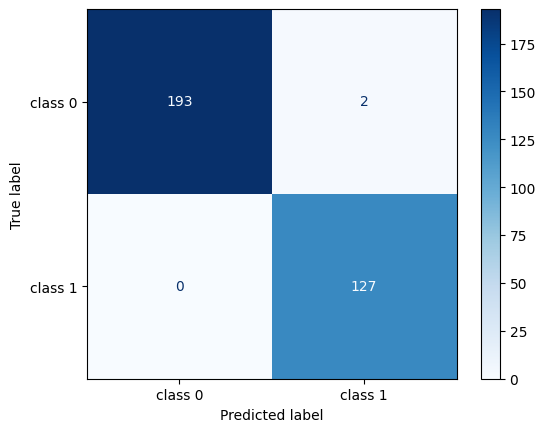

In [125]:
y_pred_probafi = best_modelrnfi.predict(X_test_fi)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnfi = (y_pred_probafi > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(y_testfi, y_predfrnfi))
ConfusionMatrixDisplay.from_predictions(y_testfi, y_predfrnfi, display_labels=target_names, cmap=plt.cm.Blues)

In [126]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(y_testfi, y_predfrnfi))

El coeficiente de correlacion de Matthews es de  0.9871163699823339


In [127]:
y_predfrnfi_flat=y_predfrnfi.flatten()

df_resultados = pd.DataFrame({
    'Clase': FI_test,
    'Real': y_testfi,
    'Predicción': y_predfrnfi_flat
})

# Añadir una columna para indicar si la predicción fue correcta o no
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicción']

# Ver los resultados de predicción junto con los casos específicos
aciertos = df_resultados.Clase[df_resultados['Correcto']==True]
errores = df_resultados.Clase[df_resultados['Correcto'] == False]



val='Dieciseisavo'

R_totales[val] = collections.Counter(df_resultados['Clase'])
R_aciertos[val] = collections.Counter(aciertos)
R_errores[val] = collections.Counter(errores)


print("Totales por clase: \n", R_totales[val])

print("Aciertos de Predicción:\n", R_aciertos[val])

print("Errores de Predicción:\n", R_errores[val] )

total_correctas = df_resultados['Correcto'].sum()
total_errores = len(df_resultados) - total_correctas
print(f"Total Correctas: {total_correctas}, Total Errores: {total_errores}")

Totales por clase: 
 0    195
1    127
Name: Dieciseisavo, dtype: int64
Aciertos de Predicción:
 0    193
1    127
Name: Dieciseisavo, dtype: int64
Errores de Predicción:
 1    NaN
0    2.0
Name: Dieciseisavo, dtype: float64
Total Correctas: 320, Total Errores: 2


# Validacion

## RFE


In [128]:
X_test_rfe.columns

Index(['std_fpktl', 'std_bpktl', 'max_bipt', 'flowBytesPerSecond',
       'mean_flowpktl', 'flow_rst', 'downUpRatio'],
      dtype='object')

In [131]:
dftrrfe=df_val_f.copy()
dftrrfe.shape


dftrfe=dftrrfe[['std_fpktl', 'std_bpktl', 'max_bipt', 'flowBytesPerSecond',
       'mean_flowpktl', 'flow_rst', 'downUpRatio','label']].copy()
print(dftrfe.shape)


# Eliminar duplicados
print("Duplicados: ",dftrfe.duplicated().sum())

dftrfe = dftrfe.drop_duplicates()

print("Valores nulos: ", dftrfe.isnull().values.sum())
dftrfe.dropna(inplace=True)

#collections.Counter(df.dftrfe.values)

# Balancear clases con subsampling (reduce clase mayoritaria)
df_class0_val = dftrfe[dftrfe['label'] == 0]
df_class1_val = dftrfe[dftrfe['label'] == 1]


df_class1_down_val = resample(df_class1_val,
                             replace=False,
                             n_samples=len(df_class0_val),
                             random_state=42)

# Dataset balanceado para validación
df_val_balanced = pd.concat([df_class0_val, df_class1_down_val])

# Mezclar datos
df_val_balanced = df_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_val_balanced['label'].value_counts())


dftrfe_test = df_val_balanced['label']
dftrfet = df_val_balanced.drop(columns=['label'])


# dftrfe_test=dftrfe['label']
# dftrfet=dftrfe.drop(columns=['label']) 


numeric_colsdftr = dftrfet.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdftr)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftrfet)
dftrfet_stand = preprocessor.transform(dftrfet)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdftrfe=list(dftrfet.columns.values.tolist())
df_rfe_dft_stand=pd.DataFrame(dftrfet_stand,columns=labelsdftrfe)

print("Valores nulos: ", df_rfe_dft_stand.isnull().values.sum())
print("Duplicados: ",df_rfe_dft_stand.duplicated().sum())


(2028, 8)
Duplicados:  0
Valores nulos:  0
label
1    148
0    148
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99       148
     class 1       1.00      0.98      0.99       148

    accuracy                           0.99       296
   macro avg       0.99      0.99      0.99       296
weighted avg       0.99      0.99      0.99       296



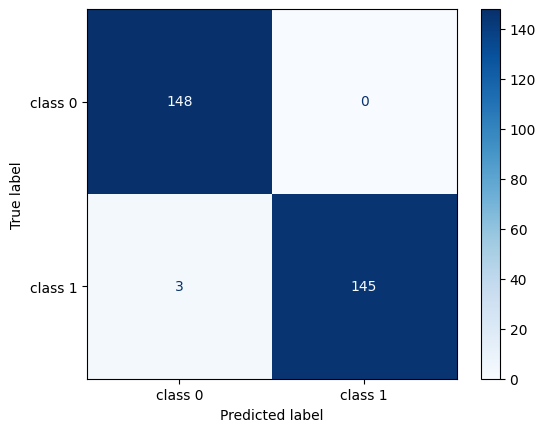

In [132]:
y_predbrlorfedt = best_modelrlo.predict(df_rfe_dft_stand)



#performance results
print(classification_report(dftrfe_test, y_predbrlorfedt, target_names=target_names))

cm = confusion_matrix(dftrfe_test, y_predbrlorfedt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.505), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(2), max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=np.int64(464), n_jobs=None,
              num_parallel_tree=None, ...)
Score: 0.9930568624815163
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.99      0.80       148
           1       0

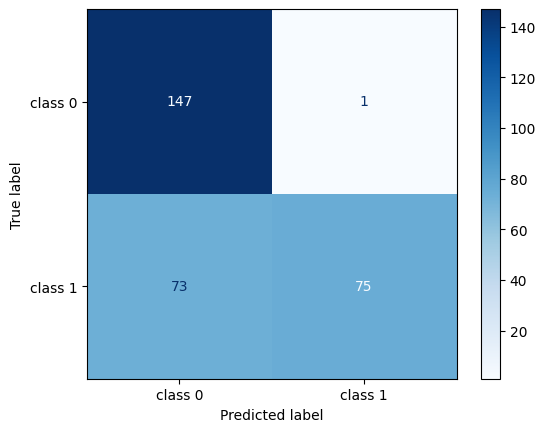

In [133]:


# Predecir y evaluar el modelo
y_predxgbrfedft = grid_xgbrfe.predict(df_rfe_dft_stand)
print("Best Parameters:", grid_xgbrfe.best_estimator_)
print("Score:", grid_xgbrfe.best_score_)
print("Classification Report:\n", classification_report(dftrfe_test, y_predxgbrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predxgbrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.9831081081081081
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.97      0.98       148

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296



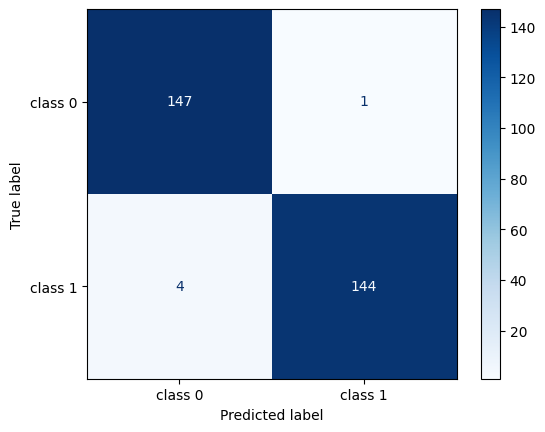

In [134]:
y_predsvmrfedft = best_modelsvmrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_predsvmrfedft))
print("Classification Report:\n", classification_report(dftrfe_test, y_predsvmrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predsvmrfedft, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.7364864864864865
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       148
           1       1.00      0.47      0.64       148

    accuracy                           0.74       296
   macro avg       0.83      0.74      0.72       296
weighted avg       0.83      0.74      0.72       296

El coeficiente de correlacion de Matthews es de  0.5565379710984114


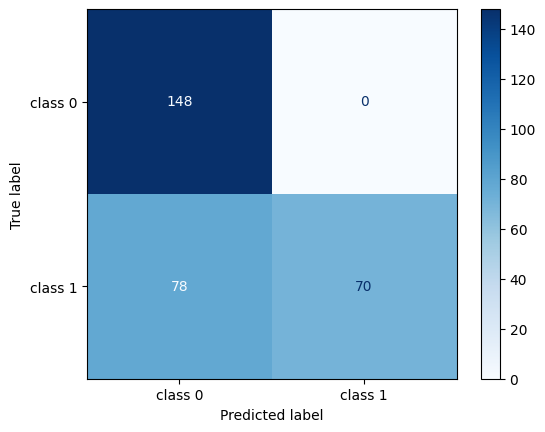

In [135]:
y_prednvrfedft=clfnvrfe.predict(df_rfe_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dftrfe_test, y_prednvrfedft))
print("Classification Report:\n", classification_report(dftrfe_test, y_prednvrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_prednvrfedft, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_prednvrfedft))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       148
           1       1.00      0.93      0.97       148

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



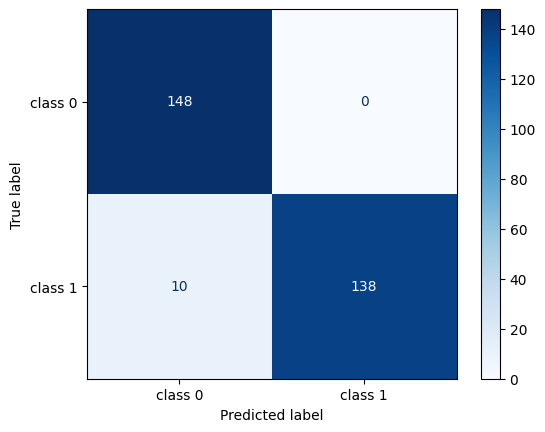

In [136]:
y_pred_probarfedft = best_modelfrnrfe.predict(df_rfe_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrnrfedft = (y_pred_probarfedft > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dftrfe_test, y_predfrnrfedft))
ConfusionMatrixDisplay.from_predictions(dftrfe_test, y_predfrnrfedft, display_labels=target_names, cmap=plt.cm.Blues)

In [137]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dftrfe_test, y_predfrnrfedft))

El coeficiente de correlacion de Matthews es de  0.9345682005712518


## FI


In [138]:
X_test_fi.columns

Index(['min_bpktl', 'max_fipt', 'std_fipt', 'mean_flowpktl', 'std_flowipt'], dtype='object')

In [139]:
dftee=df_val_f.copy()
dftee.shape


dft=dftee[['min_bpktl', 'max_fipt', 'std_fipt', 'mean_flowpktl', 'std_flowipt','label']].copy()
print(dft.shape)


# Eliminar duplicados
print("Duplicados: ",dft.duplicated().sum())

dft = dft.drop_duplicates()

print("Valores nulos: ", dft.isnull().values.sum())
dft.dropna(inplace=True)

#collections.Counter(df.dft.values)

# Balancear clases con subsampling (reduce clase mayoritaria)
dffi_class0_val = dft[dft['label'] == 0]
dffi_class1_val = dft[dft['label'] == 1]


dffi_class1_down_val = resample(dffi_class1_val,
                             replace=False,
                             n_samples=len(dffi_class0_val),
                             random_state=42)

# Dataset balanceado para validación
dffi_val_balanced = pd.concat([dffi_class0_val, dffi_class1_down_val])

# Mezclar datos
dffi_val_balanced = dffi_val_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(dffi_val_balanced['label'].value_counts())


dft_test = dffi_val_balanced['label']
dftt = dffi_val_balanced.drop(columns=['label'])

# dft_test=dft['label']
# dftt=dft.drop(columns=['label']) 


numeric_colsdft = dftt.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_colsdft)], remainder='passthrough')

# fit on the trainning dataset
preprocessor.fit_transform(dftt)
dft_stand = preprocessor.transform(dftt)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.


labelsdft=list(dftt.columns.values.tolist())
df_dft_stand=pd.DataFrame(dft_stand,columns=labelsdft)

print("Valores nulos: ", dftt.isnull().values.sum())
print("Duplicados: ",dftt.duplicated().sum())



(2028, 6)
Duplicados:  92
Valores nulos:  0
label
0    124
1    124
Name: count, dtype: int64
Valores nulos:  0
Duplicados:  0


In [140]:
dft.shape

(1936, 6)

In [141]:
# Testing model
#dtfi, mdtop
y_preddttfi = mdtop.predict(df_dft_stand)
y_probdttfi = mdtop.predict_proba(df_dft_stand)
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_preddttfi, dft_test))

Accuracy of Decision Tree-Test:  0.9032258064516129


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       124
           1       0.98      0.82      0.89       124

    accuracy                           0.90       248
   macro avg       0.91      0.90      0.90       248
weighted avg       0.91      0.90      0.90       248



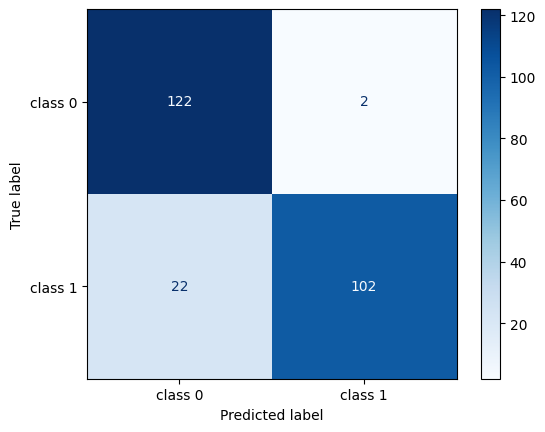

In [142]:
#Classification for test before hyperparameter tuning
print(classification_report(dft_test,y_preddttfi))
ConfusionMatrixDisplay.from_predictions(dft_test, y_preddttfi, display_labels=target_names, cmap=plt.cm.Blues)

Mejor modelo accuracy score: 0.6895
Mejores parámetros:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': np.int64(20)}
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       124
           1       0.96      0.40      0.56       124

    accuracy                           0.69       248
   macro avg       0.79      0.69      0.66       248
weighted avg       0.79      0.69      0.66       248



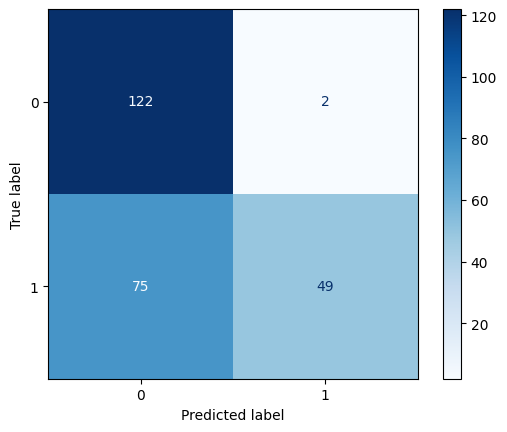

In [143]:
#RF
y_predrft = best_clfrf.predict(df_dft_stand)

# Evaluar el mejor modelo
print('Mejor modelo accuracy score: {0:0.4f}'. format(accuracy_score(dft_test, y_predrft)))
print("Mejores parámetros: ", grid_searchrf.best_params_)

print("Classification Report:\n", classification_report(dft_test, y_predrft))

# Print the Confusion Matrix and slice it into four pieces

ConfusionMatrixDisplay.from_predictions(dft_test, y_predrft, cmap=plt.cm.Blues);

In [144]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predrft))

El coeficiente de correlacion de Matthews es de  0.46889937817594424


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       124
           1       0.98      0.77      0.86       124

    accuracy                           0.88       248
   macro avg       0.89      0.88      0.87       248
weighted avg       0.89      0.88      0.87       248



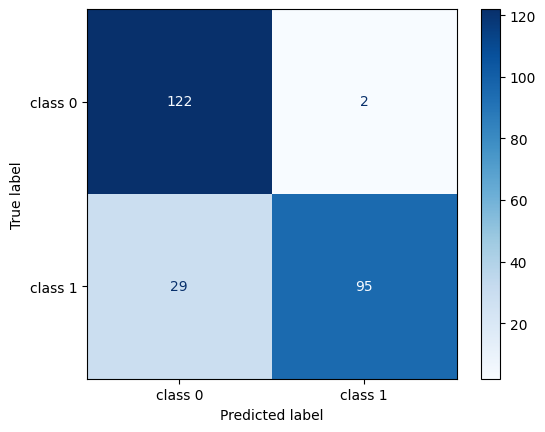

In [145]:
# Predecir y evaluar el modelo
y_predxgbfit = grid_xgbfi.predict(df_dft_stand)
print("Classification Report:\n", classification_report(dft_test, y_predxgbfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predxgbfit, display_labels=target_names, cmap=plt.cm.Blues)

In [146]:
print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_predxgbfit))

El coeficiente de correlacion de Matthews es de  0.7684376014842643


Accuracy: 0.9274193548387096
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       124
           1       1.00      0.85      0.92       124

    accuracy                           0.93       248
   macro avg       0.94      0.93      0.93       248
weighted avg       0.94      0.93      0.93       248



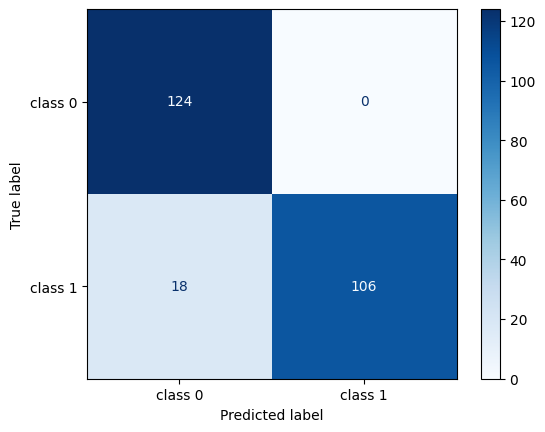

In [147]:

y_predsvmtfit = best_modelsvmdt.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_predsvmtfit))
print("Classification Report:\n", classification_report(dft_test, y_predsvmtfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predsvmtfit, display_labels=target_names, cmap=plt.cm.Blues)

Accuracy: 0.9596774193548387
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       124
           1       1.00      0.92      0.96       124

    accuracy                           0.96       248
   macro avg       0.96      0.96      0.96       248
weighted avg       0.96      0.96      0.96       248

El coeficiente de correlacion de Matthews es de  0.9223590779391269


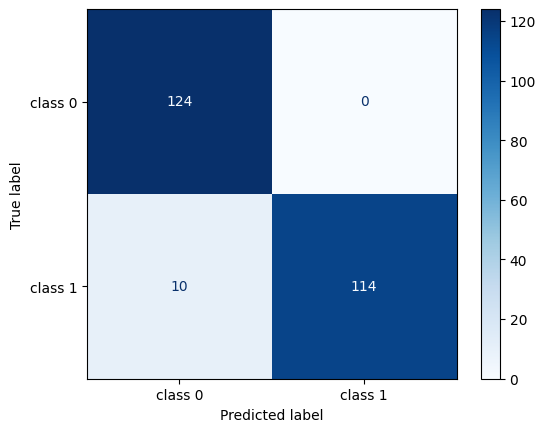

In [148]:
y_prednvfit=clfnv.predict(df_dft_stand)

# Evaluar el modelo
print("Accuracy:", accuracy_score(dft_test, y_prednvfit))
print("Classification Report:\n", classification_report(dft_test, y_prednvfit))
ConfusionMatrixDisplay.from_predictions(dft_test, y_prednvfit, display_labels=target_names, cmap=plt.cm.Blues)

print("El coeficiente de correlacion de Matthews es de ",matthews_corrcoef(dft_test, y_prednvfit))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       124
           1       1.00      0.93      0.96       124

    accuracy                           0.96       248
   macro avg       0.97      0.96      0.96       248
weighted avg       0.97      0.96      0.96       248



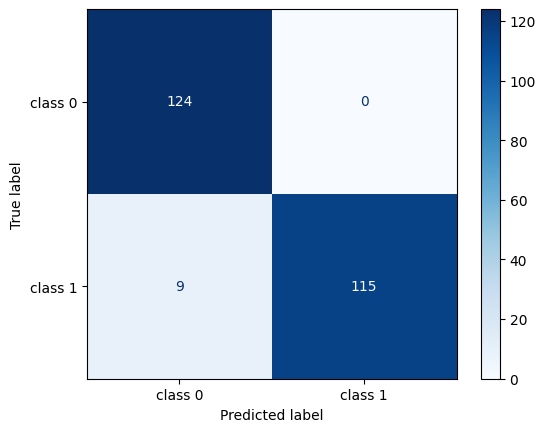

In [149]:
y_pred_probadftt = best_modelrnfi.predict(df_dft_stand)

# Convierte las probabilidades en clases binarias (0 o 1)
y_predfrndftt = (y_pred_probadftt > 0.5).astype(int)

# Calcula la matriz de confusión
print("Classification Report:\n", classification_report(dft_test, y_predfrndftt))
ConfusionMatrixDisplay.from_predictions(dft_test, y_predfrndftt, display_labels=target_names, cmap=plt.cm.Blues)